# START

In [1]:
import h5py
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import os
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from tqdm import tqdm



In [2]:
projects_dir = ["untitled","memoryLeak","Alliance_alpha","fftw_many_mpi","Alliance_alpha_1.0"]
FILENAME = "test.h5"
FILENAME_COMPLEX = "test1.h5"
HOME_PATH = "/home"
USERNAME = "alcauchy"
PROJECTS_DIR = "CLionProjects"
PROJECT_DIR = projects_dir[4]#"untitled" #memoryLeak
EXEC_DIR = "cmake-build-debug"
BASE_PATH = os.path.join(HOME_PATH,
                         USERNAME,
                         PROJECTS_DIR,
                         PROJECT_DIR,
                         EXEC_DIR)
filename = os.path.join(BASE_PATH,FILENAME)
filename_complex = os.path.join(BASE_PATH,FILENAME_COMPLEX)

In [3]:
with h5py.File(filename,'r') as f:
    for key in f.keys():
        g = f[key][()]
with h5py.File(filename_complex,'r') as f:
    for key in f.keys():
        gc = f[key][()]

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/home/alcauchy/CLionProjects/Alliance_alpha_1.0/cmake-build-debug/test.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [5]:
mask = np.abs(g)>0


NameError: name 'g' is not defined

In [124]:
g.shape

(256, 256, 66, 32, 2, 2)

In [125]:
np.count_nonzero(g[...,0,0])

134217728

In [126]:
def show_data(nz,nm):
    plt.pcolormesh(g[:,:,nz,nm,0,0],shading = 'auto')
    #plt.clim([-1,1])
    plt.colorbar()
    #/(g.shape[0]*g.shape[1]*g.shape[2])*2

In [127]:
interact(show_data,nz=(0,g.shape[2]-1),nm=(0,g.shape[3]-1))

interactive(children=(IntSlider(value=32, description='nz', max=65), IntSlider(value=15, description='nm', max…

<function __main__.show_data(nz, nm)>

In [110]:
def show_data(nx,nm):
    plt.pcolormesh(g[nx,:,:,nm,0,0],shading = 'auto')
    #plt.clim([-1,1])
    plt.colorbar()
    #/(g.shape[0]*g.shape[1]*g.shape[2])*2

In [111]:
interact(show_data,nx=(0,g.shape[0]-1),nm=(0,g.shape[3]-1))

interactive(children=(IntSlider(value=127, description='nx', max=255), IntSlider(value=15, description='nm', m…

<function __main__.show_data(nx, nm)>

In [24]:
x = np.asarray([i*2*np.pi/64 for i in range(64)])
y = np.asarray([i*2*np.pi/64 for i in range(64)])
z = np.asarray([i*2*np.pi/64 for i in range(64)])
f = np.cos(x)[:,None,None]*np.cos(y)[None,:,None]*np.cos(z)[None,None,:]
f = np.cos(x)[:,None,None]*np.cos(y)[None,:,None]*np.sin(z)[None,None,:]
#f = np.sin(x)[None,:,None]*np.ones((64,64,64))

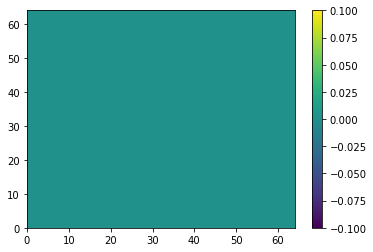

In [25]:
plt.pcolormesh(f[:,:,0],shading = 'auto')
plt.colorbar()

In [38]:
gc[0,0,0,0,0,0]

(0.5041468625441877+0.4869205381194691j)

In [66]:
def show_data(nz,nm):
    plt.pcolormesh(np.abs(gc[:,:,nz,nm,0,0]),shading = 'auto')
    #plt.clim([-1,1])
    plt.colorbar()
    #/(g.shape[0]*g.shape[1]*g.shape[2])*2

In [67]:
interact(show_data,nz=(0,gc.shape[2]-1),nm=(0,gc.shape[3]-1))

interactive(children=(IntSlider(value=16, description='nz', max=32), IntSlider(value=15, description='nm', max…

<function __main__.show_data(nz, nm)>

In [457]:
plt.pcolormesh((f[:,:,20]-g[0,0,0,...,20]/64**3),shading = 'auto')
plt.colorbar()

IndexError: index 20 is out of bounds for axis 5 with size 2

In [458]:
plt.pcolormesh(xv,yv,cosx,shading = 'auto')
plt.colorbar()

NameError: name 'xv' is not defined

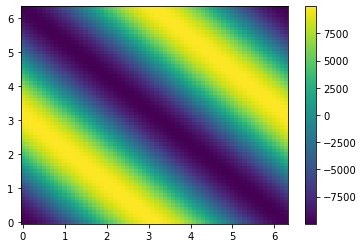

In [13]:
plt.pcolormesh(xv,yv,g[0,0,2,:,:,0]-cosx,shading = 'auto')
plt.colorbar()

In [14]:
g[0,0,2,:,32,:]

array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-0.99518473, -0.99518473, -0.99518473, ..., -0.99518473,
        -0.99518473, -0.99518473],
       [-0.98078528, -0.98078528, -0.98078528, ..., -0.98078528,
        -0.98078528, -0.98078528],
       ...,
       [-0.95694034, -0.95694034, -0.95694034, ..., -0.95694034,
        -0.95694034, -0.95694034],
       [-0.98078528, -0.98078528, -0.98078528, ..., -0.98078528,
        -0.98078528, -0.98078528],
       [-0.99518473, -0.99518473, -0.99518473, ..., -0.99518473,
        -0.99518473, -0.99518473]])

In [156]:
b = np.zeros((64,64,64))
b+=1
a = np.fft.rfftn(b)
a

array([[[262144.+0.j,      0.+0.j,      0.-0.j, ...,      0.+0.j,
              0.+0.j,      0.+0.j],
        [     0.+0.j,      0.+0.j,      0.+0.j, ...,      0.+0.j,
              0.+0.j,      0.+0.j],
        [     0.+0.j,      0.+0.j,      0.+0.j, ...,      0.+0.j,
              0.+0.j,      0.+0.j],
        ...,
        [     0.+0.j,      0.+0.j,      0.+0.j, ...,      0.+0.j,
              0.+0.j,      0.+0.j],
        [     0.+0.j,      0.+0.j,      0.+0.j, ...,      0.+0.j,
              0.+0.j,      0.+0.j],
        [     0.+0.j,      0.+0.j,      0.+0.j, ...,      0.+0.j,
              0.+0.j,      0.+0.j]],

       [[     0.+0.j,      0.+0.j,      0.+0.j, ...,      0.+0.j,
              0.+0.j,      0.+0.j],
        [     0.+0.j,      0.+0.j,      0.+0.j, ...,      0.+0.j,
              0.+0.j,      0.+0.j],
        [     0.+0.j,      0.+0.j,      0.+0.j, ...,      0.+0.j,
              0.+0.j,      0.+0.j],
        ...,
        [     0.+0.j,      0.+0.j,      0.+0.j, ...,  

In [151]:
a = np.zeros((64,64,32),dtype = np.complex128)
a[1,1,0] += 1
b = np.fft.irfftn(a)

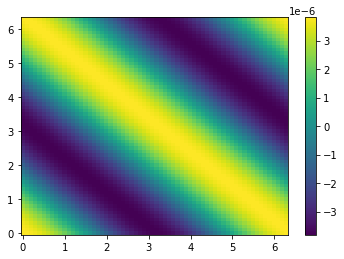

In [152]:
plt.pcolormesh(xv,yv,g[0,0,2,:,:,0].T/64/64/64,shading = 'auto')
plt.colorbar()

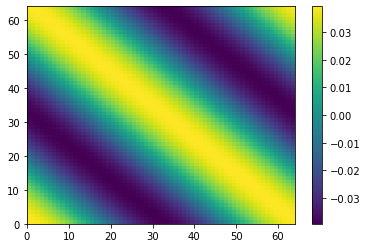

In [17]:
plt.pcolormesh(b[:,:,10],shading = 'auto')
plt.colorbar()

In [18]:
a.shape

(64, 64, 32)

In [19]:
b.shape

(64, 64, 62)

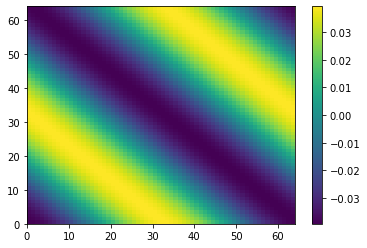

In [20]:
plt.pcolormesh((g[0,0,2,:,:,0]/64/64/64-b[:,:,0]),shading = 'auto')
plt.colorbar()

In [393]:
x = np.linspace(0,2*np.pi,64)
y = np.linspace(0,2*np.pi,64)
z = np.linspace(0,2*np.pi,64)
xx,yy,zz = np.meshgrid(x,y,z)

In [394]:
k = np.linspace(1/(2*np.pi),32/(2*np.pi),32)
f = np.cos(x)[:,None,None]*np.cos(y)[None,:,None]*np.cos(z)[None,None,:]
#f = np.cos(3*xx+6*yy+8*zz)
#f = np.cos(2*np.pi*3*xx)+np.cos(2*np.pi*6*yy)+np.cos(2*np.pi*8*zz)
#f = np.cos(xx)*cos(yy)*coszz
#f *=0
#f += 1;
e = np.exp(2*np.pi/64*1j*x)[:,None,None]*np.exp(2*np.pi/64*1j*y)[None,:,None]*np.exp(2*np.pi/64*1j*z)[None,None,:]

In [298]:
fk = np.zeros((32,32,32),dtype = np.complex128)
for i,kx in enumerate(k):
    for j,ky in enumerate(k):
        for l,kz in enumerate(k):
            fk[int(kx),int(ky),int(kz)] = np.sum(f * np.exp(-1/32*1j*x*kx)[:,None,None]*np.exp(-1/32*1j*y*ky)[None,:,None]*np.exp(-1/32*1j*z*kz)[None,None,:])

In [299]:
fk.shape

(32, 32, 32)

In [300]:
mask = np.abs(fk[:,:,:])>1e-7

In [303]:
fk[mask].shape

(216,)

In [302]:
fk[0,0,0]

(969.5422087054931-280.108667621044j)

In [282]:
fk[-1,-1,-3]

0j

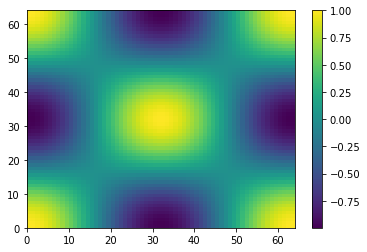

In [395]:
plt.pcolormesh(f[:,:,0],shading = 'auto')
plt.colorbar()

# DEALIASING

In [186]:
FILENAME_DEALIAS = 'test_deal.h5'
FILENAME_ALIAS = 'test_non_deal.h5'
FILENAME_REAL = 'test.h5'
FILENAME_REAL1  = 'test1.h5'

In [187]:
filename_dealias = os.path.join(BASE_PATH,FILENAME_DEALIAS)
filename_alias = os.path.join(BASE_PATH,FILENAME_ALIAS)
filename_real = os.path.join(BASE_PATH,FILENAME_REAL)
filename_real1 = os.path.join(BASE_PATH,FILENAME_REAL1)

In [188]:
with h5py.File(filename_dealias,'r') as f:
    for key in f.keys():
        g_d = f[key][()]
with h5py.File(filename_alias,'r') as f:
    for key in f.keys():
        g_a = f[key][()]
with h5py.File(filename_real,'r') as f:
    for key in f.keys():
        g = f[key][()]
        
with h5py.File(filename_real1,'r') as f:
    for key in f.keys():
        g1 = f[key][()]

In [189]:
g_a.dtype

dtype('<f8')

In [190]:
def show_data(nz,nm):
    plt.pcolormesh(g[:,:,nz,nm,0,0],shading = 'auto')
    #plt.clim([-1,1])
    plt.colorbar()
    #/(g.shape[0]*g.shape[1]*g.shape[2])*2
    

In [191]:
interact(show_data,nz=(0,g.shape[2]-1),nm=widgets.IntSlider(min=0, max=g_a.shape[3]-1, step=1, value=0))

interactive(children=(IntSlider(value=6, description='nz', max=13), IntSlider(value=0, description='nm', max=1…

<function __main__.show_data(nz, nm)>

In [192]:
def show_data(nz,nm):
    plt.pcolormesh(g1[:,:,nz,nm,0,0]*g[:,:,nz,nm,0,0],shading = 'auto')
    #plt.clim([-1,1])
    plt.colorbar()
    #/(g.shape[0]*g.shape[1]*g.shape[2])*2

In [179]:
interact(show_data,nz=(0,g.shape[2]-1),nm=widgets.IntSlider(min=0, max=g_a.shape[3]-1, step=1, value=0))

NameError: name 'g' is not defined

In [193]:
def show_data(nz,nm):
    plt.pcolormesh(g_a[:,:,nz,nm,0,0],shading = 'auto')
    #plt.clim([-1,1])
    plt.colorbar()
    #/(g.shape[0]*g.shape[1]*g.shape[2])*2

In [194]:
interact(show_data,nz=(0,g_a.shape[2]-1),nm=widgets.IntSlider(min=0, max=g_a.shape[3]-1, step=1, value=0))

interactive(children=(IntSlider(value=6, description='nz', max=13), IntSlider(value=0, description='nm', max=1…

<function __main__.show_data(nz, nm)>

In [182]:
def show_data(nz,nm):
    plt.pcolormesh(g_a[:,:,nz,nm,0,0]-g_d[:,:,nz,nm,0,0],shading = 'auto')
    #plt.clim([-1,1])
    plt.colorbar()
    #/(g.shape[0]*g.shape[1]*g.shape[2])*2

In [183]:
interact(show_data,nz=(0,g_a.shape[2]-1),nm=widgets.IntSlider(min=0, max=g_a.shape[3]-1, step=1, value=0))

interactive(children=(IntSlider(value=6, description='nz', max=13), IntSlider(value=0, description='nm', max=1…

<function __main__.show_data(nz, nm)>

In [184]:
def show_data(nz,nm):
    plt.pcolormesh(g_d[:,:,nz,nm,0,0],shading = 'auto')
    #plt.clim([-1,1])
    plt.colorbar()
    #/(g.shape[0]*g.shape[1]*g.shape[2])*2

In [185]:
interact(show_data,nz=(0,g_a.shape[2]-1),nm=widgets.IntSlider(min=0, max=g_a.shape[3]-1, step=1, value=0))

interactive(children=(IntSlider(value=6, description='nz', max=13), IntSlider(value=0, description='nm', max=1…

<function __main__.show_data(nz, nm)>

In [67]:
nx,ny,nz = g_d.shape[0:3]
conv_ar = np.zeros((nx,ny,nz),dtype = np.complex128)
conv_ar1 = np.zeros((nx,ny,nz),dtype = np.complex128)
mode = 7
conv_ar[mode,0,0]= (100)
conv_ar[-mode,-0,-0] = (100)

conv_ar1[mode,0,0]= (100)
conv_ar1[-mode,-0,-0] = (100)

conv_ar_sq = np.zeros((nx,ny,nz),dtype = np.complex128)

In [68]:
sumc = 0
for ix1 in tqdm(range(nx)):
    for iy1 in range(ny):
        for iz1 in range(nz):
            sumc=0;
            for ix2 in range(nx):
                for iy2 in range(ny):
                    for iz2 in range(nz):
                        #if((ix1-ix2>=0) and (iy1-iy2>=0) and (iz1-iz2>=0)):
                            sumc+= conv_ar[ix2,iy2,iz2]*(conv_ar1[ix1-ix2,iy1-iy2,iz1-iz2])
            conv_ar_sq[ix1,iy1,iz1] = np.copy(sumc);
            
                       

100%|███████████████████████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  4.36it/s]


In [43]:
sumc = 0
for ix1 in tqdm(range(nx)):
    for iy1 in range(ny):
        for iz1 in range(nz):
            sumc=0;
            sumc+= conv_ar[66,0,0]*(conv_ar1[ix1-66,iy1-0,iz1-0])
            sumc+= conv_ar[96-66,0,0]*(conv_ar1[ix1-96+66,iy1-0,iz1-0])
            conv_ar_sq[ix1,iy1,iz1] = np.copy(sumc);
            
                       

100%|██████████████████████████████████████████████████████████████████████████████| 96/96 [00:00<00:00, 102.41it/s]


In [44]:
conv_ar_sq_r = np.fft.ifftn(conv_ar_sq,norm = 'forward')

In [45]:
def show_data(nz):
    plt.pcolormesh(np.real(conv_ar_sq_r[:,:,nz]),shading = 'auto')
    #plt.clim([-1,1])
    plt.colorbar()
    #/(g.shape[0]*g.shape[1]*g.shape[2])*2

In [46]:
interact(show_data,nz=(0,conv_ar_sq_r.shape[2]-1),)

interactive(children=(IntSlider(value=16, description='nz', max=33), Output()), _dom_classes=('widget-interact…

<function __main__.show_data(nz)>

In [47]:
def show_data(nz):
    plt.pcolormesh(np.real(conv_ar_sq_r[:,:,nz])-g_a[:,:,nz,0,0,0],shading = 'auto')
    #plt.clim([-1,1])
    plt.colorbar()
    #/(g.shape[0]*g.shape[1]*g.shape[2])*2

In [48]:
interact(show_data,nz=(0,conv_ar_sq_r.shape[2]-1),)

interactive(children=(IntSlider(value=16, description='nz', max=33), Output()), _dom_classes=('widget-interact…

<function __main__.show_data(nz)>

In [24]:
def show_data(nz,nm):
    plt.pcolormesh(g_d[:,:,nz,nm,0,0]-g_a[:,:,nz,nm,0,0],shading = 'auto')
    #plt.clim([-1,1])
    plt.colorbar()
    #/(g.shape[0]*g.shape[1]*g.shape[2])*2

In [25]:
interact(show_data,nz=(0,g_a.shape[2]-1),nm=widgets.IntSlider(min=0, max=g_a.shape[3]-1, step=1, value=0))

interactive(children=(IntSlider(value=6, description='nz', max=13), IntSlider(value=0, description='nm', max=3…

<function __main__.show_data(nz, nm)>

In [52]:
with h5py.File(filename_real1,'r') as f:
    for key in f.keys():
        g1 = f[key][()]

In [53]:
def show_data(nz,nm):
    plt.pcolormesh(np.abs(g1[:,:,nz,nm,0,0]),shading = 'auto')
    #plt.clim([-1,1])
    plt.colorbar()
    #/(g.shape[0]*g.shape[1]*g.shape[2])*2

In [54]:
interact(show_data,nz=(0,g_a.shape[2]-1),nm=widgets.IntSlider(min=0, max=g_a.shape[3]-1, step=1, value=0))

interactive(children=(IntSlider(value=6, description='nz', max=13), IntSlider(value=0, description='nm', max=1…

<function __main__.show_data(nz, nm)>

In [ ]:
conv_ar_sq

In [69]:
def show_data(nz,nm):
    plt.pcolormesh(np.abs(conv_ar_sq[:,:,nz]),shading = 'auto')
    #plt.clim([-1,1])
    plt.colorbar()
    #/(g.shape[0]*g.shape[1]*g.shape[2])*2

In [70]:
interact(show_data,nz=(0,g_a.shape[2]-1),nm=widgets.IntSlider(min=0, max=g_a.shape[3]-1, step=1, value=0))

interactive(children=(IntSlider(value=6, description='nz', max=13), IntSlider(value=0, description='nm', max=1…

<function __main__.show_data(nz, nm)>

In [170]:
js = np.arange(12)/12
cos = np.cos(js*np.pi*2*11)
cos2 = cos*cos

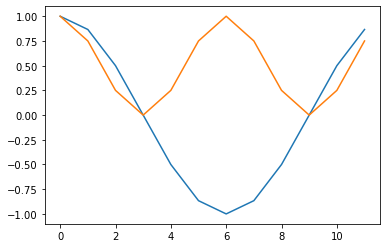

In [171]:
plt.plot(cos)
plt.plot(cos2)

In [195]:
js = 2 * np.pi * np.arange(16)/16
js1 = 2 * np.pi * np.arange(32)/32

In [196]:
cos = np.cos(4*js)
cos1 = np.cos(4*js1)

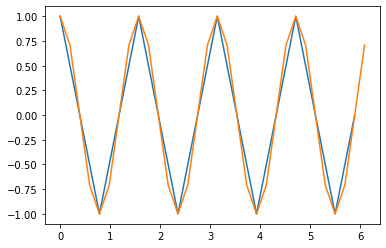

In [199]:
plt.plot(js,cos)
plt.plot(js1,cos1)

# DEALIASING 1

In [41]:
FILENAME_DEALIAS = 'test_deal.h5'
FILENAME_ALIAS = 'test_non_deal.h5'
FILENAME_REAL = 'test.h5'
FILENAME_REAL1  = 'test1.h5'

In [42]:
filename_dealias = os.path.join(BASE_PATH,FILENAME_DEALIAS)
filename_alias = os.path.join(BASE_PATH,FILENAME_ALIAS)
filename_real = os.path.join(BASE_PATH,FILENAME_REAL)
filename_real1 = os.path.join(BASE_PATH,FILENAME_REAL1)

In [43]:
with h5py.File(filename_dealias,'r') as f:
    for key in f.keys():
        g_d = f[key][()]
        
with h5py.File(filename_alias,'r') as f:
    for key in f.keys():
        g_a = f[key][()]
        
with h5py.File(filename_real,'r') as f:
    for key in f.keys():
        g = f[key][()]
        
with h5py.File(filename_real1,'r') as f:
    for key in f.keys():
        g1 = f[key][()]

In [39]:
def show_data(nz,nm):
    x = np.linspace(0,2*np.pi, g_a.shape[0])
    y = np.linspace(0,2*np.pi, g_a.shape[1])
    yy,xx = np.meshgrid(x,y)
    plt.subplot(121)
    plt.pcolormesh(y,x,g_a[:,:,nz,nm,0,0],shading = 'auto')
    plt.subplot(122)
    x = np.linspace(0,2*np.pi, g_d.shape[0])
    y = np.linspace(0,2*np.pi, g_d.shape[1])
    plt.pcolormesh(y,x,g_d[:,:,nz,nm,0,0],shading = 'auto')
    #plt.clim([-1,1])
    plt.colorbar()
    #/(g.shape[0]*g.shape[1]*g.shape[2])*2

In [40]:
interact(show_data,nz=(0,g_a.shape[2]-1),nm=widgets.IntSlider(min=0, max=g_a.shape[3]-1, step=1, value=0))

interactive(children=(IntSlider(value=1, description='nz', max=3), IntSlider(value=0, description='nm', max=15…

<function __main__.show_data(nz, nm)>

In [9]:
def show_data(nz,nm):
    x = np.linspace(0,2*np.pi, g.shape[0])
    y = np.linspace(0,2*np.pi, g.shape[1])
    yy,xx = np.meshgrid(x,y)
    plt.subplot(121)
    plt.pcolormesh(y,x,g[:,:,nz,nm,0,0],shading = 'auto')
    plt.subplot(122)
    x = np.linspace(0,2*np.pi, g1.shape[0])
    y = np.linspace(0,2*np.pi, g1.shape[1])
    plt.pcolormesh(y,x,g1[:,:,nz,nm,0,0],shading = 'auto')
    #plt.clim([-1,1])
    plt.colorbar()
    #/(g.shape[0]*g.shape[1]*g.shape[2])*2
    

In [10]:
interact(show_data,nz=(0,g.shape[2]-1),nm=widgets.IntSlider(min=0, max=g_a.shape[3]-1, step=1, value=0))

interactive(children=(IntSlider(value=1, description='nz', max=3), IntSlider(value=0, description='nm', max=15…

<function __main__.show_data(nz, nm)>

In [11]:
nx,ny,nz = g_d.shape[0:3]
conv_ar = np.zeros((nx,ny,nz),dtype = np.complex128)
conv_ar1 = np.zeros((nx,ny,nz),dtype = np.complex128)
mode = 7
conv_ar[mode,0,0]= (1)
conv_ar[-mode,-0,-0] = (1)

conv_ar1[mode,0,0]= (1)
conv_ar1[-mode,-0,-0] = (1)

conv_ar_sq = np.zeros((nx,ny,nz),dtype = np.complex128)

In [12]:
sumc = 0
for ix1 in tqdm(range(nx)):
    for iy1 in range(ny):
        for iz1 in range(nz):
            sumc=0;
            for ix2 in range(nx):
                for iy2 in range(ny):
                    for iz2 in range(nz):
                        #if((ix1-ix2>=0) and (iy1-iy2>=0) and (iz1-iz2>=0)):
                            sumc+= conv_ar[ix2,iy2,iz2]*(conv_ar1[ix1-ix2,iy1-iy2,iz1-iz2])
            conv_ar_sq[ix1,iy1,iz1] = np.copy(sumc);
            
                       

100%|███████████████████████████████████████████████████████████████████████████████| 64/64 [00:00<00:00, 69.88it/s]


In [13]:
conv_ar_sq_r = np.fft.ifftn(conv_ar_sq,norm = 'forward')

In [14]:
def show_data(nz):
    plt.pcolormesh(np.real(conv_ar_sq_r[:,:,nz]),shading = 'auto')
    #plt.clim([-1,1])
    plt.colorbar()
    #/(g.shape[0]*g.shape[1]*g.shape[2])*2

In [15]:
interact(show_data,nz=(0,conv_ar_sq_r.shape[2]-1),)

interactive(children=(IntSlider(value=1, description='nz', max=3), Output()), _dom_classes=('widget-interact',…

<function __main__.show_data(nz)>

In [16]:
def show_data(nz,nm):
    x = np.linspace(0,2*np.pi, g_d.shape[0])
    y = np.linspace(0,2*np.pi, g_d.shape[1])
    yy,xx = np.meshgrid(x,y)
    plt.pcolormesh(y,x,g_d[:,:,nz,nm,0,0],shading = 'auto')
    #plt.clim([-1,1])
    plt.colorbar()
    #/(g.shape[0]*g.shape[1]*g.shape[2])*2

In [17]:
interact(show_data,nz=(0,g_a.shape[2]-1),nm=widgets.IntSlider(min=0, max=g_a.shape[3]-1, step=1, value=0))

interactive(children=(IntSlider(value=1, description='nz', max=3), IntSlider(value=0, description='nm', max=15…

<function __main__.show_data(nz, nm)>

In [18]:
nkx = 12
kx = 5
js = np.arange(nkx)
ks = np.arange(nkx)
xk = np.zeros(nkx,dtype = np.complex128)
xk[kx] = 1
xk[-kx] = 1
xj = np.sum(xk[None,:]*np.exp(2*np.pi*1.j*js[:,None]*ks[None,:]/nkx),axis = 1)
xj_2 = np.sum(xk[None,:]*np.exp(2*np.pi*1.j*js[:,None]*ks[None,:]/nkx),axis = 1)*np.sum(xk[None,:]*np.exp(2*np.pi*1.j*js[:,None]*ks[None,:]/nkx),axis = 1)
xk_2 = np.sum(xj_2[:,None]*np.exp(-2*np.pi*1.j/nkx * js[:,None] *(ks[None,:])),axis = 0)
xj1 = np.sum(np.exp(2*np.pi*1.j*js[:,None]/nkx*(2*kx-ks[None,:]))+np.exp(2*np.pi*1.j*js[:,None]/nkx*(2*(-kx)-ks[None,:]))+2*np.exp(2*np.pi*1.j*js[:,None]/nkx*(-ks[None,:])),axis = 0)
#xk*

/home/alcauchy/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/alcauchy/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


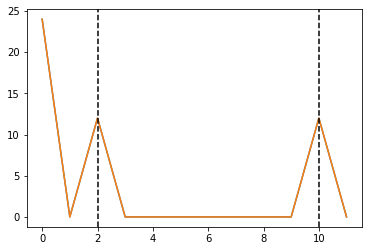

In [19]:
plt.plot(xk_2)
plt.plot(xj1)
plt.axvline(x = 2*kx,color='k', linestyle = '--')
plt.axvline(x = nkx-2*kx,color='k', linestyle = '--')

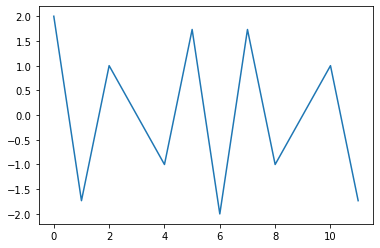

In [20]:
plt.plot(g1[:,0,0,0,0,0])

In [28]:
wavevectors = np.arange(nkx)
wavevectors[6:] = -wavevectors[6:0:-1]
conv_ar = np.zeros((nkx),dtype = np.complex128)
conv_ar[kx]= (1)
conv_ar[-kx] = (1)
conv_ar_sq = np.zeros((nkx),dtype = np.complex128)
sumc = 0
for ix1 in tqdm(range(nkx)):
    sumc=0;
    for ix2 in range(nkx):
        for ix3 in range(nkx):
            if(wavevectors[ix2] + wavevectors[ix3]==wavevectors[ix1]):
                conv_ar_sq[ix1] += conv_ar[ix2]*(conv_ar[(ix3)])    
        #if(ix1-ix2<=0):
        #sumc+= conv_ar[ix2]*(conv_ar[(ix1-ix2)])
        

100%|█████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 4881.35it/s]


/home/alcauchy/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


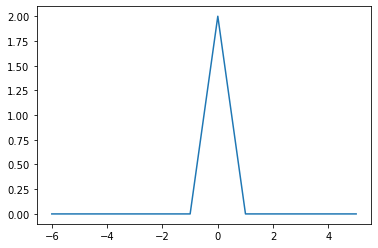

In [29]:
plt.plot(np.fft.fftshift(wavevectors),np.fft.fftshift(conv_ar_sq))

In [30]:
wavevectors[5]+wavevectors[5]==wavevectors[10]

False

In [31]:
np.fft.fftshift(wavevectors)

array([-6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

In [32]:
wavevectors

array([ 0,  1,  2,  3,  4,  5, -6, -5, -4, -3, -2, -1])

In [35]:
np.fft.fftfreq(12,1/12)

array([ 0.,  1.,  2.,  3.,  4.,  5., -6., -5., -4., -3., -2., -1.])

# DEALIASING 2

In [157]:
FILENAME_DEALIAS = 'test_deal.h5'
FILENAME_ALIAS = 'test_non_deal.h5'
FILENAME_REAL = 'test.h5'
FILENAME_REAL1  = 'test1.h5'

In [158]:
filename_dealias = os.path.join(BASE_PATH,FILENAME_DEALIAS)
filename_alias = os.path.join(BASE_PATH,FILENAME_ALIAS)
filename_real = os.path.join(BASE_PATH,FILENAME_REAL)
filename_real1 = os.path.join(BASE_PATH,FILENAME_REAL1)

In [159]:
with h5py.File(filename_dealias,'r') as f:
    for key in f.keys():
        g_d = f[key][()]
        
with h5py.File(filename_alias,'r') as f:
    for key in f.keys():
        g_a = f[key][()]
        
with h5py.File(filename_real,'r') as f:
    for key in f.keys():
        g = f[key][()]
        
with h5py.File(filename_real1,'r') as f:
    for key in f.keys():
        g1 = f[key][()]

In [160]:
nkx = 12
kx = 5
wavevectors = np.fft.fftfreq(nkx,1/nkx)
conv_ar = np.zeros((nkx),dtype = np.complex128)
conv_ar[kx]= (nkx)
conv_ar[-kx] = (nkx)
conv_ar_sq = np.zeros((nkx),dtype = np.complex128)
sumc = 0
for ix1 in tqdm(range(nkx)):
    sumc=0;
    for ix2 in range(nkx):
        for ix3 in range(nkx):
            if(wavevectors[ix2] + wavevectors[ix3]==wavevectors[ix1]):
                conv_ar_sq[ix1] += conv_ar[ix2]*(conv_ar[(ix3)]) /nkx/nkx
        #if(ix1-ix2<=0):
        #sumc+= conv_ar[ix2]*(conv_ar[(ix1-ix2)])
        

100%|█████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 1701.37it/s]


/home/alcauchy/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


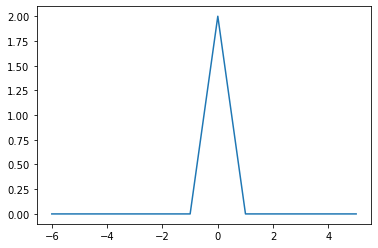

In [161]:
plt.plot(np.fft.fftshift(wavevectors),np.fft.fftshift(conv_ar_sq))

/home/alcauchy/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/alcauchy/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/alcauchy/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-6.0, 5.0)

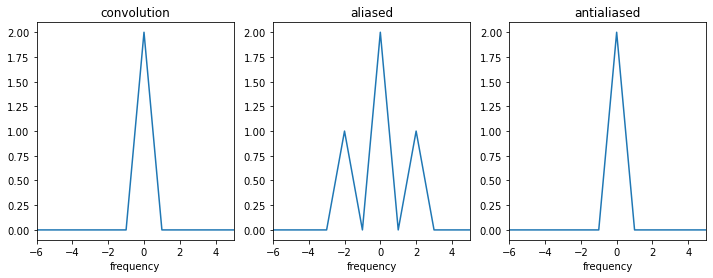

In [162]:
size = 4
fig = plt.figure(figsize = [3 * size, 1 * size])
ax1 = fig.add_subplot(131)
ax1.set_xlabel('frequency')
ax1.set_title('convolution')
ax1.plot(np.fft.fftshift(wavevectors),np.fft.fftshift(conv_ar_sq))
ax1.set_xlim([-6,5])

ax2 = fig.add_subplot(132)
ax2.set_xlabel('frequency')
ax2.set_title('aliased')
ax2.set_xlim([-6,5])
ax2.plot(np.fft.fftshift(wavevectors),np.fft.fftshift(g1[:,0,0,0,0,0]))

ax3 = fig.add_subplot(133)
ax3.set_xlabel('frequency')
ax3.set_title('antialiased')
freq = np.fft.fftfreq(g.shape[0],1/g.shape[0])
ax3.plot(np.fft.fftshift(freq),np.fft.fftshift(g[:,0,0,0,0,0]))
ax3.set_xlim([-6,5])

/home/alcauchy/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


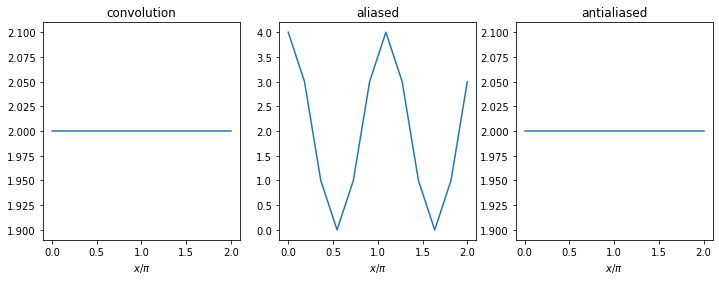

In [163]:
size = 4
fig = plt.figure(figsize = [3 * size, 1 * size])
ax1 = fig.add_subplot(131)
ax1.set_xlabel(f'$x/\pi$')
ax1.set_title('convolution')
x = np.linspace(0,2*np.pi, nkx)/np.pi
conv_sq = np.fft.ifft(conv_ar_sq)*nkx
ax1.plot(x,conv_sq)

ax2 = fig.add_subplot(132)
ax2.set_xlabel(f'$x/\pi$')
ax2.set_title('aliased')
ax2.plot(x,(g_a[:,0,0,0,0,0]))

ax3 = fig.add_subplot(133)
ax3.set_xlabel(f'$x/\pi$')
ax3.set_title('antialiased')
x = np.linspace(0,2*np.pi, g_d.shape[0])/np.pi
ax3.plot(x,(g_d[:,0,0,0,0,0]))

# Fields Test

In [93]:
projects_dir = ["untitled","memoryLeak","Alliance_alpha","fftw_many_mpi","Alliance_alpha_1.0"]
FILENAME_A = "A.h5"
FILENAME_B = "B.h5"
FILENAME_PHI = "phi.h5"
FILENAME_G = "testFields"
HOME_PATH = "/home"
USERNAME = "alcauchy"
PROJECTS_DIR = "CLionProjects"
PROJECT_DIR = projects_dir[4]#"untitled" #memoryLeak
EXEC_DIR = "cmake-build-debug"
BASE_PATH = os.path.join(HOME_PATH,
                         USERNAME,
                         PROJECTS_DIR,
                         PROJECT_DIR,
                         EXEC_DIR)
filename_a = os.path.join(BASE_PATH,FILENAME_A)
filename_b = os.path.join(BASE_PATH,FILENAME_B)
filename_phi = os.path.join(BASE_PATH,FILENAME_PHI)
filename_g = os.path.join(BASE_PATH,FILENAME_G)

In [94]:
with h5py.File(filename_a,'r') as f:
    for key in f.keys():
        A = f[key][()]
        
with h5py.File(filename_b,'r') as f:
    for key in f.keys():
        B = f[key][()]
        
with h5py.File(filename_phi,'r') as f:
    for key in f.keys():
        Phi = f[key][()]
        
with h5py.File(filename_g,'r') as f:
    for key in f.keys():
        g = f[key][()]

In [95]:
Ar = np.fft.irfftn(A)
Br = np.fft.irfftn(B)
Phir = np.fft.irfftn(Phi)

In [96]:
A.shape

(64, 64, 9)

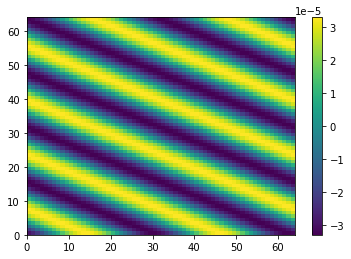

In [97]:
plt.pcolormesh(Ar[:,:,0],shading = 'auto')
plt.colorbar()

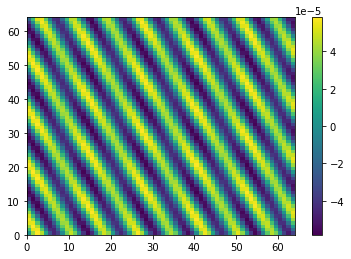

In [98]:
plt.pcolormesh(Br[:,:,0],shading = 'auto')
plt.colorbar()

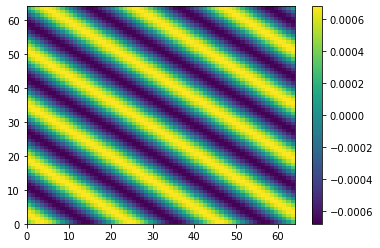

In [99]:
plt.pcolormesh(Phir[:,:,0],shading = 'auto')
plt.colorbar()

In [100]:
gr10 = np.fft.irfftn(g[...,1,0,0])
gr00 = np.fft.irfftn(g[...,0,0,0])
gr01 = np.fft.irfftn(g[...,0,1,0])
gr10.shape

(64, 64, 16)

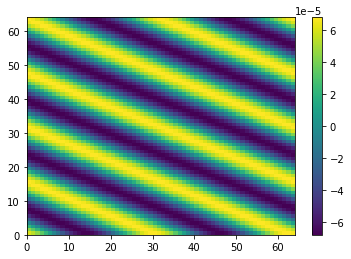

In [101]:
plt.pcolormesh(gr10[:,:,0],shading = 'auto')
plt.colorbar()

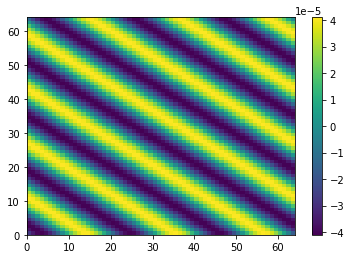

In [102]:
plt.pcolormesh(gr00[:,:,0],shading = 'auto')
plt.colorbar()

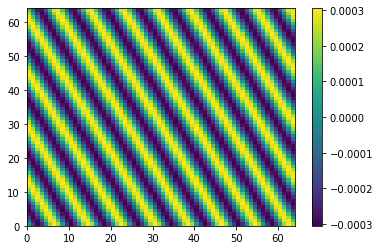

In [103]:
plt.pcolormesh(gr01[:,:,0],shading = 'auto')
plt.colorbar()

# MAIN function test

In [78]:
projects_dir = ["untitled","memoryLeak","Alliance_alpha","fftw_many_mpi","ALLIANCE"]
FILENAME = "parameters.h5"
FILENAME_COMPLEX = "test1.h5"
HOME_PATH = "/home"
USERNAME = "alcauchy"
PROJECTS_DIR = "CLionProjects"
PROJECT_DIR = projects_dir[4]#"untitled" #memoryLeak
EXEC_DIR = "cmake-build-debug"
BASE_PATH = os.path.join(HOME_PATH,
                         USERNAME,
                         PROJECTS_DIR,
                         PROJECT_DIR,
                         EXEC_DIR)
filename = os.path.join(BASE_PATH,FILENAME)

In [79]:
with h5py.File(filename,'r') as f:
    f.visit(print)
    #for key in f.keys():
     #   print(key)

    freeEnergy = f["/freeEnergy/freeEnergy"][()];
    timestep = f["/freeEnergy/timestep"][()];
    kx = f["/kSpace/kx"][()];
    ky = f["/kSpace/ky"][()];
    kz = f["/kSpace/kz"][()];
    shells = f["/spectra/shells"][()]
    kSpec = f["/spectra/kSpec"][()]
    mSpec = f["/spectra/mSpec"][()]
    kspecT = f["/spectra/timestep"][()]

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/home/alcauchy/CLionProjects/ALLIANCE/cmake-build-debug/parameters.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [144]:
filename = os.path.join(BASE_PATH,"checkpoint_300.h5")
with h5py.File(filename,'r') as f:
    f.visit(print)
    h = f["h"][()]
    q = f["charge"][()]
    #h = f["beta"][()]
    checkpoint_timestep = f["timestep"][()]
checkpoint_timestep

beta
charge
density
h
mass
nkx
nky
nkz
nl
nm
ns
temperature
timestep


array([300], dtype=int32)

In [145]:
filename = os.path.join(BASE_PATH,"checkpoint_0.h5")
with h5py.File(filename,'r') as f:
    f.visit(print)
    h0 = f["h"][()]
    q = f["charge"][()]
    #h = f["beta"][()]
    checkpoint_timestep = f["timestep"][()]

beta
charge
density
h
mass
nkx
nky
nkz
nl
nm
ns
temperature
timestep


In [146]:
h0-h

array([[[[[[0.+0.j, 0.+0.j],
           [0.+0.j, 0.+0.j]],

          [[0.+0.j, 0.+0.j],
           [0.+0.j, 0.+0.j]],

          [[0.+0.j, 0.+0.j],
           [0.+0.j, 0.+0.j]],

          ...,

          [[0.+0.j, 0.+0.j],
           [0.+0.j, 0.+0.j]],

          [[0.+0.j, 0.+0.j],
           [0.+0.j, 0.+0.j]],

          [[0.+0.j, 0.+0.j],
           [0.+0.j, 0.+0.j]]],


         [[[0.+0.j, 0.+0.j],
           [0.+0.j, 0.+0.j]],

          [[0.+0.j, 0.+0.j],
           [0.+0.j, 0.+0.j]],

          [[0.+0.j, 0.+0.j],
           [0.+0.j, 0.+0.j]],

          ...,

          [[0.+0.j, 0.+0.j],
           [0.+0.j, 0.+0.j]],

          [[0.+0.j, 0.+0.j],
           [0.+0.j, 0.+0.j]],

          [[0.+0.j, 0.+0.j],
           [0.+0.j, 0.+0.j]]],


         [[[0.+0.j, 0.+0.j],
           [0.+0.j, 0.+0.j]],

          [[0.+0.j, 0.+0.j],
           [0.+0.j, 0.+0.j]],

          [[0.+0.j, 0.+0.j],
           [0.+0.j, 0.+0.j]],

          ...,

          [[0.+0.j, 0.+0.j],
           [0.+0.j,

In [113]:
filename = os.path.join(BASE_PATH,"fields.h5")
with h5py.File(filename,'r') as f:
    f.visit(print)
    A = f["A"][()]
    B = f["B"][()]
    phi = f["phi"][()]
    kx = f["kx"][()]
    ky = f["ky"][()]
    kz = f["kz"][()]
    timestep = f["timestep"][()]
    

A
B
kx
ky
kz
phi
timestep


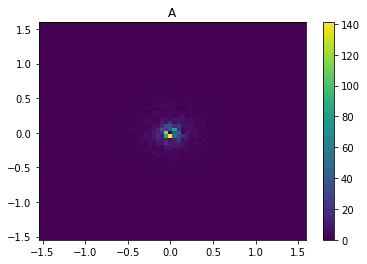

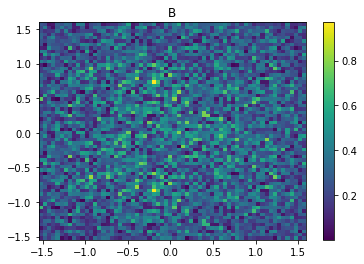

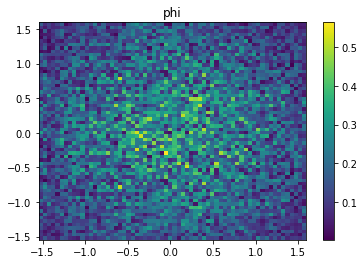

In [114]:
t = -1
kz = -1
kxGrid = np.roll(np.fft.fftshift(kx),-1)
kyGrid = np.roll(np.fft.fftshift(kx),-1)
plt.figure()
plt.title("A")
Aplot = np.roll(np.fft.fftshift(A,axes = [1,2]),-1,axis = [1,2])
plt.pcolormesh(kxGrid,kyGrid,np.abs(Aplot[t,:,:,kz]))
plt.colorbar()

plt.figure()
plt.title("B")
Bplot = np.roll(np.fft.fftshift(B,axes = [1,2]),-1,axis = [1,2])
plt.pcolormesh(kxGrid,kyGrid,np.abs(Bplot[t,:,:,kz]))
plt.colorbar()

plt.figure()
plt.title("phi")
Phiplot = np.roll(np.fft.fftshift(phi,axes = [1,2]),-1,axis = [1,2])
plt.pcolormesh(kxGrid,kyGrid,np.abs(Phiplot[t,:,:,kz]))
plt.colorbar()
#plt.pcolormesh(kxGrid,kyGrid,np.abs(A[t,:,:,kz]))
#plt.colorbar()

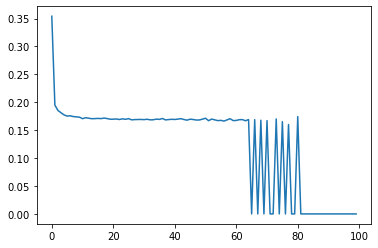

In [115]:
plt.plot(np.abs(kSpec[-1,:]))

In [116]:
print(mSpec[0,:])

[ 1.63695595 68.51636114  0.90346486  2.25054714  1.10786849  1.42186944
  1.89917439  1.09571804  1.38740378  1.45548693  0.90346486  2.25054714
  1.10786849  1.42186944  1.89917439  1.09571804]


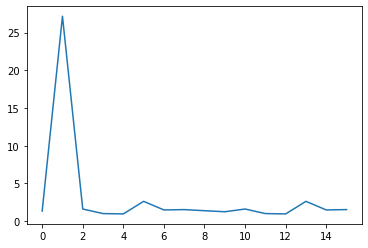

In [46]:
plt.plot(np.abs(mSpec[3,:]))

In [281]:
freeEnergy

array([411340.62865518, 411340.62865518, 411340.62865518, 411340.62865518,
       411340.62865518, 411340.62865518, 411340.62865518, 411340.62865518,
       411340.62865518, 411340.62865518])

Text(0.5, 0, 'free energy')

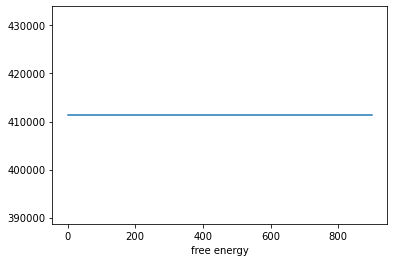

In [282]:
plt.plot(timestep,freeEnergy)
plt.xlabel("timestep")
plt.xlabel("free energy")

In [119]:
timestep

array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900], dtype=int32)

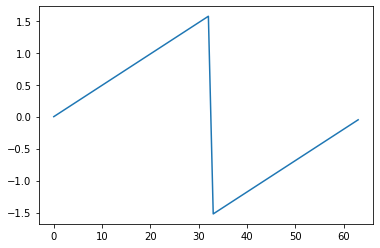

In [120]:
plt.plot(kx)

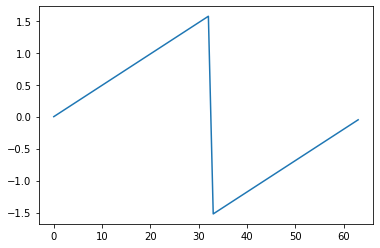

In [36]:
plt.plot(ky)

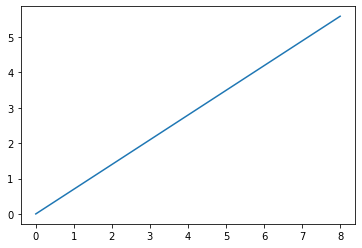

In [37]:
plt.plot(kz)

# LINEAR RK4

In [31]:
projects_dir = ["ALLIANCE","memoryLeak","Alliance_alpha","fftw_many_mpi","Alliance_alpha_1.0"]
wrk_dir = "wrk"
chk_dir = "checkpoint"
sim_dir = ["testfold"]
FIGURE_DIR = "fig"
HOME_PATH = "/home"
USERNAME = "alcauchy"
PROJECTS_DIR = "CLionProjects"
PROJECT_DIR = projects_dir[-1]
BASE_PATH = os.path.join(HOME_PATH,
                         USERNAME,
                         PROJECTS_DIR,
                         PROJECT_DIR,
                         wrk_dir,
                        sim_dir[0])
if not os.path.exists(FIGURE_DIR):
    os.makedirs(FIGURE_DIR)

In [32]:
FILENAME = "parameters.h5"
filename_params = os.path.join(BASE_PATH, FILENAME)

In [33]:
with h5py.File(filename_params,'r') as f:
    f.visit(print)
    mspec = f["spectra/mSpec"][()]
    kz = f["kSpace/kz"][()]
    kx = f["kSpace/kx"][()]
    ky = f["kSpace/ky"][()]
    shells = f["spectra/shells"][()]
    kspec = f["spectra/kSpec"][()]
    freeEn = f["freeEnergy/freeEnergy"][()]
mGrid = np.arange(1,mspec.shape[1]+1)

freeEnergy
freeEnergy/dt
freeEnergy/freeEnergy
freeEnergy/timestep
kSpace
kSpace/kx
kSpace/ky
kSpace/kz
spectra
spectra/dt
spectra/kSpec
spectra/mSpec
spectra/shells
spectra/timestep


In [34]:
mspec[2]

array([1.95412031e+11, 1.12321816e+11, 1.45205085e+11, 1.44685661e+11,
       1.45665396e+11, 1.60948903e+11, 1.71639040e+11, 1.66520791e+11,
       1.26179147e+11, 1.31687450e+11, 7.68993577e+10, 1.42541231e+11,
       1.47279827e+11, 1.03764177e+11, 1.16364915e+11, 1.48946067e+11])

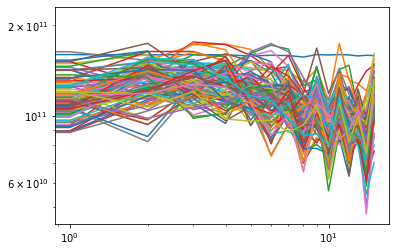

In [35]:
#plt.plot(mspec[-1,:])
for i in range(mspec.shape[0]):
    plt.loglog(mspec[i,:])
    #plt.ylim([0,250])

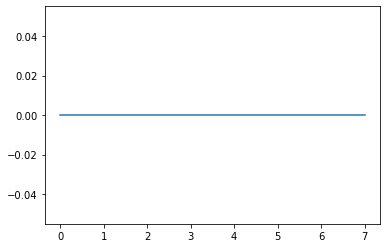

In [36]:
plt.plot(kspec[-1,:])

In [37]:
import matplotlib
matplotlib.animation.writers.list()

['pillow', 'ffmpeg', 'ffmpeg_file', 'html']

In [38]:
shells

array([0.    , 0.7675, 1.535 , 2.3025, 3.07  , 3.8375, 4.605 , 5.3725])

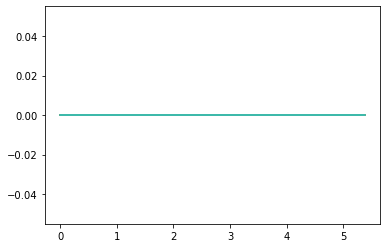

In [39]:
for i in range(kspec.shape[0]):
    plt.plot(shells,kspec[i,:])

In [40]:
from IPython import display

In [41]:
mspec.shape

(100, 16)

In [42]:
def plotTriptich(spectrum, freeEnergy,mGrid):
    fig, ax = plt.subplots(1,3,figsize = (15,5))
    #for i in range(3):
     #   ax[i].set_box_aspect(1)
    for i in range(2):
        ax[i].set_ylim(0.1,np.amax(spectrum)*1.1)
        ax[i].set_xlim(1,spectrum.shape[1]+1)
        ax[i].set_yscale("log")
        #ax[i].set_xscale("log")
        ax[i].set_xlabel("m")
        ax[i].set_ylabel("m spectra")
    ax[0].set_title("time evolution")
    ax[1].set_title("time averaged")
    ax[-1].set_title("free energy")
    ax[-1].set_ylim(0,1.1)
    ax[-1].set_xlim(0,freeEnergy.shape[0])
    ax[-1].set_xlabel("timestep")
    ax[-1].set_ylabel(f"W/W_{0}")
    
    spectrumAv = np.mean(spectrum[:],axis = 0)
    spectrumTh = 1.2*spectrumAv[2]*(mGrid/mGrid[2])**(-1/2)
    ax[1].plot(mGrid, spectrumAv)
    start = 2
    end = mGrid[-1]//3
    ax[1].plot(mGrid[start:end], spectrumTh[start:end],color = "k",linestyle = '--')
    ax[-1].plot(freeEnergy/freeEnergy[0])
    line, = ax[0].plot([])
    plt.tight_layout()
    return fig, line

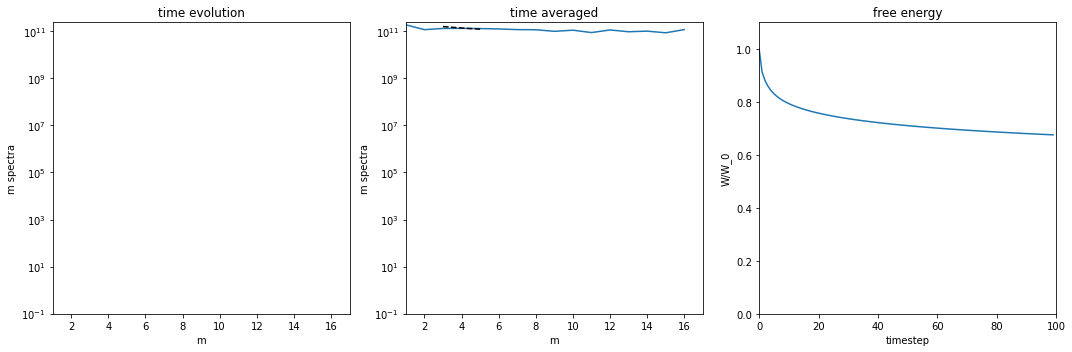

In [43]:
fig,line = plotTriptich(mspec,freeEn,mGrid)

In [44]:
mspec.shape[0]

100

In [45]:
import matplotlib.animation as manimation
from matplotlib.animation import FuncAnimation
def animate(frame_num,data):
    line.set_data((mGrid,data[frame_num,:]))
    return line
anim = FuncAnimation(fig, animate, frames=mspec.shape[0], interval=mspec.shape[0],fargs = [mspec])
#anim = FuncAnimation(fig, animate, frames=10, interval=10)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
#plt.close()   

In [523]:
def write_TriptichMovie(filename):
    MOVIE_NAME = os.path.join(FIGURE_DIR, filename)
    FFMpegWriter = manimation.writers['ffmpeg']
    metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
    writer = FFMpegWriter(fps=15, metadata=metadata)

    with writer.saving(fig, MOVIE_NAME, mspec.shape[0]):
        for i in range(100):
            animate(i,mspec)
            writer.grab_frame()

In [524]:
write_TriptichMovie("single_wavevector.mp4")

In [497]:
mspecAv = np.mean(mspec,axis = 0)

/tmp/ipykernel_4237/2277660312.py:5: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0,1000])


(0.00012004551574848215, 1000)

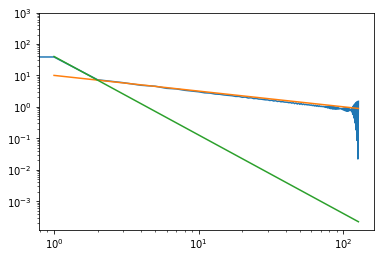

In [500]:
plt.loglog(mspecAv[:])
x = np.arange(1,mspecAv.shape[0])
plt.plot(x,10*x**(-1/2))
plt.plot(x,40*x**(-5/2))
plt.ylim([0,1000])

(0.0, 1.5)

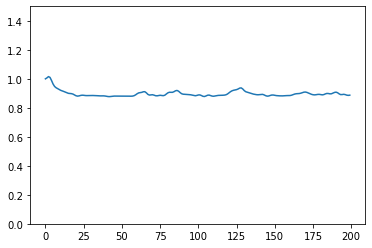

In [12]:
plt.plot(freeEn[:]/freeEn[0])
plt.ylim([0,1.5])

In [199]:
FILENAME_H = ["h_0.h5"]
filename_h = filename_params = os.path.join(BASE_PATH, FILENAME_H[0])
with h5py.File(filename_h,'r') as f:
    f.visit(print)
    h0 = f["h"][()]
    
FILENAME_H = ["h_100.h5"]
filename_h = filename_params = os.path.join(BASE_PATH, FILENAME_H[0])
with h5py.File(filename_h,'r') as f:
    f.visit(print)
    h = f["h"][()]

g


KeyError: "Unable to open object (object 'h' doesn't exist)"

In [503]:
hs = []
gs = []
timestep= np.arange(0,2000,10)
for step in timestep:
    filename_h = f"h_{step}.h5"
    filename_g = f"g_{step}.h5"
    H_FILE = os.path.join(BASE_PATH,filename_h)
    G_FILE = os.path.join(BASE_PATH,filename_g)
    with h5py.File(H_FILE) as f:
        hs.append(f["g"][()])
    with h5py.File(G_FILE) as f:
        gs.append(f["g"][()])
hs = np.asarray(hs)
gs = np.asarray(gs)

In [504]:
mspecCheck = np.sum(gs*np.conj(hs), axis = (1,2,3,5,6))

In [505]:
anim = FuncAnimation(fig, animate, frames=mspec.shape[0], interval=mspec.shape[0],fargs = [mspecCheck])
#anim = FuncAnimation(fig, animate, frames=10, interval=10)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)

/home/alcauchy/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


# LINEAR RHS

In [259]:
projects_dir = ["ALLIANCE","memoryLeak","Alliance_alpha","fftw_many_mpi","Alliance_alpha_1.0"]
wrk_dir = "wrk"
chk_dir = "checkpoint"
sim_dir = ["testfold"]
HOME_PATH = "/home"
USERNAME = "alcauchy"
PROJECTS_DIR = "CLionProjects"
PROJECT_DIR = projects_dir[-1]
BASE_PATH = os.path.join(HOME_PATH,
                         USERNAME,
                         PROJECTS_DIR,
                         PROJECT_DIR,
                         wrk_dir,
                        sim_dir[0])

In [260]:
filename = os.path.join(BASE_PATH,"h.h5")
with h5py.File(filename,'r') as f:
    f.visit(print)
    h = f["g"][()]

filename = os.path.join(BASE_PATH,"rhs.h5")
with h5py.File(filename,'r') as f:
    f.visit(print)
    rhs = f["g"][()]

g
g


In [261]:
FILENAME = "parameters.h5"
filename_params = os.path.join(BASE_PATH, FILENAME)
with h5py.File(filename_params,'r') as f:
    f.visit(print)
    mspec = f["spectra/mSpec"][()]
    kz = f["kSpace/kz"][()]
    kx = f["kSpace/kx"][()]
    freeEn = f["freeEnergy/freeEnergy"][()]
    temp = f["parameters/temperature"][()]
    mass = f["parameters/mass"][()]

freeEnergy
freeEnergy/dt
freeEnergy/freeEnergy
freeEnergy/timestep
kSpace
kSpace/kx
kSpace/ky
kSpace/kz
parameters
parameters/J00
parameters/J10
parameters/beta
parameters/charge
parameters/density
parameters/mass
parameters/temperature
spectra
spectra/dt
spectra/kSpec
spectra/mSpec
spectra/shells
spectra/timestep


In [262]:
kx

array([ 0.        ,  0.06283185,  0.12566371,  0.18849556,  0.25132741,
        0.31415927,  0.37699112,  0.43982297,  0.50265482,  0.56548668,
        0.62831853,  0.69115038,  0.75398224,  0.81681409,  0.87964594,
        0.9424778 ,  1.00530965, -0.9424778 , -0.87964594, -0.81681409,
       -0.75398224, -0.69115038, -0.62831853, -0.56548668, -0.50265482,
       -0.43982297, -0.37699112, -0.31415927, -0.25132741, -0.18849556,
       -0.12566371, -0.06283185])

In [263]:
sqrtm = np.sqrt(np.arange(9)/2)
vT = np.sqrt(2*temp/mass)

In [264]:
def getRHS(data):
    rhs = np.zeros(data.shape,dtype = data.dtype)
    sqrtm = np.sqrt(np.arange(data.shape[3] + 1)/2)
    rhs[...,1:-1,:,:] = 1.j * kz[None,None,:,None,None,None] * vT[None,None,None,None,None,:]*  (sqrtm[None,None,None,1:-2,None,None] * h[...,:-2,:,:] + sqrtm[None,None,None,2:-1,None,None] * h[...,2:,:,:])
    rhs[...,0,:,:] = 1.j * kz[None,None,:,None,None]*vT[None,None,None,None,:] * (sqrtm[None,None,None,1,None,None] * h[...,1,:,:])
    rhs[...,-1,:,:] = 1.j * kz[None,None,:,None,None]*vT[None,None,None,None,:] * (sqrtm[None,None,None,-2,None,None] * h[...,-2,:,:])
                                                             
    return  rhs

In [265]:
sqrtm

array([0.        , 0.70710678, 1.        , 1.22474487, 1.41421356,
       1.58113883, 1.73205081, 1.87082869, 2.        ])

In [266]:
rhsCheck = getRHS(h)

In [267]:
np.allclose(rhs,rhsCheck)

True

# MEMORY CONSUMPTION ESTIMATION

In [2]:
nkx = 128
nky = 128
nkz = 64
nz = 2*nkz
nm = 64
nl = 2
ns = 2
BYTES = 1/8
DOUBLE = 64
COMPLEX = 2 * DOUBLE
KILO = 1/1024

SINGLE_FULL_COMPLEX_ARR = nkx * nky * nkz * nm * nl * ns * COMPLEX * BYTES * KILO * KILO * KILO 
print(f"single h array will take {SINGLE_FULL_COMPLEX_ARR} GB of space")

SINGLE_CHI_COMPLEX_ARR = nkx * nky * nkz * 3 * ns * COMPLEX * BYTES * KILO * KILO * KILO 
print(f"single CHIS array will take {SINGLE_CHI_COMPLEX_ARR} GB of space")

SINGLE_FIELD_COMPLEX_ARR = nkx * nky * nkz * 3 * COMPLEX * BYTES * KILO * KILO * KILO 
print(f"single FIELDS array will take {SINGLE_FIELD_COMPLEX_ARR} GB of space")

print(f"rhs size is {SINGLE_FULL_COMPLEX_ARR} GB of size")
RK4_SIZE = 5*SINGLE_FULL_COMPLEX_ARR
print(f"RK4 will require {RK4_SIZE} GB of size")
FFTW_BUF_OUTOFPLACE = SINGLE_FULL_COMPLEX_ARR*2
print(f"FFTW out-of-place transform will require {FFTW_BUF_OUTOFPLACE} GB")

print(f"FFTW in-place transform will require {SINGLE_FULL_COMPLEX_ARR} GB")
print(f"linear term require {SINGLE_FULL_COMPLEX_ARR} GB")
NONLTERM = SINGLE_FULL_COMPLEX_ARR * 6 + SINGLE_CHI_COMPLEX_ARR * 4 
NONLTERM_SHRINKED = SINGLE_FULL_COMPLEX_ARR
print(f"nonlinear term require {NONLTERM } GB (real, imaginary array + buffer array to store nonlinear product)")
print(f"total size will take: rhs array, g and h arrays, field arrays,chi arrays, RK4, FFTW buffers size, differentiated arrays {SINGLE_FULL_COMPLEX_ARR + 2 * SINGLE_FULL_COMPLEX_ARR + SINGLE_FIELD_COMPLEX_ARR + SINGLE_CHI_COMPLEX_ARR + RK4_SIZE + NONLTERM + FFTW_BUF_OUTOFPLACE} GB ")

print(f"total size with size decreased will take {SINGLE_FULL_COMPLEX_ARR + 2 * SINGLE_FULL_COMPLEX_ARR + SINGLE_FIELD_COMPLEX_ARR + SINGLE_CHI_COMPLEX_ARR + RK4_SIZE + NONLTERM_SHRINKED +  SINGLE_FULL_COMPLEX_ARR} GB ")

single h array will take 4.0 GB of space
single CHIS array will take 0.09375 GB of space
single FIELDS array will take 0.046875 GB of space
rhs size is 4.0 GB of size
RK4 will require 20.0 GB of size
FFTW out-of-place transform will require 8.0 GB
FFTW in-place transform will require 4.0 GB
linear term require 4.0 GB
nonlinear term require 24.375 GB (real, imaginary array + buffer array to store nonlinear product)
total size will take: rhs array, g and h arrays, field arrays,chi arrays, RK4, FFTW buffers size, differentiated arrays 64.515625 GB 
total size with size decreased will take 40.140625 GB 


In [37]:
SINGLE_FULL_COMPLEX_ARR

8.0

In [6]:
RK4_SIZE = 5 * SINGLE_FULL_COMPLEX_ARR
INIT_SIZE = 2 * SINGLE_FULL_COMPLEX_ARR
NONLINEAR_SIZE  = SINGLE_FULL_COMPLEX_ARR
TOT = RK4_SIZE + INIT_SIZE + NONLINEAR_SIZE

In [7]:
TOT

32.0

In [8]:
RK4_SIZE

20.0

In [15]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
for i in range(1,9): 
    a[i] = a[i-1] + a[i+1]

In [13]:
a

array([ 0,  2,  5,  9, 14, 20, 27, 35, 44,  9])

In [23]:
filename = os.path.join(BASE_PATH,"h_3.h5")
with h5py.File(filename,'r') as f:
    f.visit(print)
    h = f["g"][()]

filename = os.path.join(BASE_PATH,"g_3.h5")
with h5py.File(filename,'r') as f:
    f.visit(print)
    g = f["g"][()]

g
g


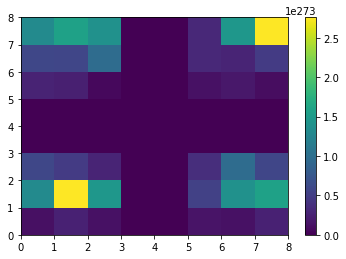

In [25]:
plt.pcolormesh(np.abs(g[...,0,0,0,0]))
plt.colorbar()

In [125]:
x = np.linspace(0,2 * np.pi,8)
cos = np.cos(x)
h = np.ones([8,8,8]) * cos[:,None,None]
chi = np.ones([8,8,8]) * cos[None,:,None]

In [126]:
a = np.fft.rfftn(h*chi)

In [127]:
a[1,1,0]

(97.89718857081017+97.89718857081012j)

In [128]:
h[:,0,0]

array([ 1.        ,  0.6234898 , -0.22252093, -0.90096887, -0.90096887,
       -0.22252093,  0.6234898 ,  1.        ])

In [155]:
h_c = np.zeros([8,8,4],dtype = np.complex128)
chi_c = np.zeros([8,8,4],dtype = np.complex128)
h_c[1,0,0] = -1.j * kx[1]
chi_c[0,1,0] = -1.j*  ky[1]
h_r = np.fft.irfftn(h_c)
chi_r = np.fft.irfftn(chi_c)
a = h_r * chi_r 
b = np.fft.rfftn(a)

In [156]:
np.nonzero(b)

(array([1, 1, 1, 1, 3, 3, 3, 3, 5, 5, 5, 5, 7, 7, 7, 7]),
 array([1, 3, 5, 7, 1, 3, 5, 7, 1, 3, 5, 7, 1, 3, 5, 7]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [157]:
b[7,1,0]

(0.00010039880779102943+0j)

In [158]:
0.00007530/b[1,1,0]

(-0.750008906049261-0j)

In [159]:
384/8/8

6.0

In [160]:
kx

array([ 0.        ,  0.39269908,  0.78539816,  1.17809725,  1.57079633,
       -1.17809725, -0.78539816, -0.39269908])

In [162]:
ky.shape

(8,)

# POISSON BRACKET CHECK

In [15]:
w1 = 4 * 2. * np.pi
w2 = 5 * 2. * np.pi
nx = 128
ny = 128
nz = 128
lx = 1
ly = 1
lz = 1
xx = np.linspace(0,lx, nx,endpoint=False)
yy = np.linspace(0,ly, ny,endpoint=False)
kx =  np.fft.fftfreq(nx,d = lx)*nx * 2. * np.pi
ky =  np.fft.fftfreq(ny,d = ly)*nx * 2. * np.pi
kz =  np.fft.fftfreq(nz)

f1 = np.reshape(np.ones(nx*ny*nz),(nx,ny,nz))
f1 = f1 * np.cos(w1 * xx)[:,None,None]*np.sin(w1 * yy)[None,:,None]
f2 = np.reshape(np.ones(nx*ny*nz),(nx,ny,nz))
f2 = f2 * np.sin(w2 * xx)[:,None,None]*np.sin(w2 * yy)[None,:,None]
f1k = np.fft.rfftn(f1)
f2k = np.fft.rfftn(f2)


In [16]:
kx

array([   0.        ,    6.28318531,   12.56637061,   18.84955592,
         25.13274123,   31.41592654,   37.69911184,   43.98229715,
         50.26548246,   56.54866776,   62.83185307,   69.11503838,
         75.39822369,   81.68140899,   87.9645943 ,   94.24777961,
        100.53096491,  106.81415022,  113.09733553,  119.38052084,
        125.66370614,  131.94689145,  138.23007676,  144.51326207,
        150.79644737,  157.07963268,  163.36281799,  169.64600329,
        175.9291886 ,  182.21237391,  188.49555922,  194.77874452,
        201.06192983,  207.34511514,  213.62830044,  219.91148575,
        226.19467106,  232.47785637,  238.76104167,  245.04422698,
        251.32741229,  257.61059759,  263.8937829 ,  270.17696821,
        276.46015352,  282.74333882,  289.02652413,  295.30970944,
        301.59289474,  307.87608005,  314.15926536,  320.44245067,
        326.72563597,  333.00882128,  339.29200659,  345.57519189,
        351.8583772 ,  358.14156251,  364.42474782,  370.70793

In [17]:
xx.shape

(128,)

In [18]:
f1kx = 1.j * kx[:,None,None] * f1k 
df1dx = np.fft.irfftn(f1kx)
f1ky = 1.j * ky[None,:,None] * f1k 
df1dy = np.fft.irfftn(f1ky)

f2kx = 1.j * kx[:,None,None] * f2k
df2dx = np.fft.irfftn(f2kx)
f2ky = 1.j * ky[None,:,None] * f2k
df2dy = np.fft.irfftn(f2ky)
poisson = df1dx * df2dy - df2dx * df1dy
pk = np.fft.rfft(poisson)

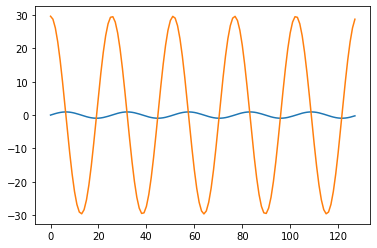

In [19]:
plt.plot(f2[:,5,0])
plt.plot(df2dx[:,5,0])

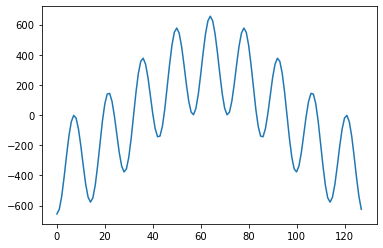

In [22]:
plt.plot(poisson[:,45,0])

In [24]:
np.sum(poisson)

9.313225746154785e-10

In [408]:
psn = -np.sin(w1 * xx)[:,None] * np.sin(w2 * xx)[:,None] * np.sin(w1 *yy)[None,:] * np.cos(w2 * yy)[None,:] - np.cos(w1 *xx)[:,None] * np.cos(w2*xx)[:,None] * np.sin(w1 * yy)[None,:] * np.sin(w2*yy)[None,:]

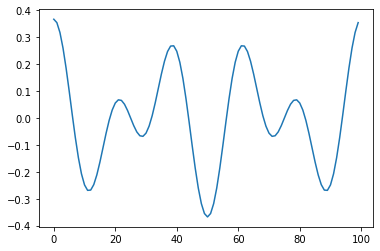

In [412]:
plt.plot(psn[:,44])

In [224]:
f1k = np.fft.rfftn(f1)

In [225]:
f1k[1,1,0]

(15691.965157874682-249416.6438902109j)

In [29]:
f1k[10-1,10-1,0]

(140.67792702601218+193.62655536796643j)

In [30]:
kx

array([ 0. ,  0.1,  0.2,  0.3,  0.4, -0.5, -0.4, -0.3, -0.2, -0.1])

In [455]:
xx = np.linspace(0,1,64,endpoint = False)

In [456]:
np.cos(2*np.pi *xx)

array([ 1.00000000e+00,  9.95184727e-01,  9.80785280e-01,  9.56940336e-01,
        9.23879533e-01,  8.81921264e-01,  8.31469612e-01,  7.73010453e-01,
        7.07106781e-01,  6.34393284e-01,  5.55570233e-01,  4.71396737e-01,
        3.82683432e-01,  2.90284677e-01,  1.95090322e-01,  9.80171403e-02,
        6.12323400e-17, -9.80171403e-02, -1.95090322e-01, -2.90284677e-01,
       -3.82683432e-01, -4.71396737e-01, -5.55570233e-01, -6.34393284e-01,
       -7.07106781e-01, -7.73010453e-01, -8.31469612e-01, -8.81921264e-01,
       -9.23879533e-01, -9.56940336e-01, -9.80785280e-01, -9.95184727e-01,
       -1.00000000e+00, -9.95184727e-01, -9.80785280e-01, -9.56940336e-01,
       -9.23879533e-01, -8.81921264e-01, -8.31469612e-01, -7.73010453e-01,
       -7.07106781e-01, -6.34393284e-01, -5.55570233e-01, -4.71396737e-01,
       -3.82683432e-01, -2.90284677e-01, -1.95090322e-01, -9.80171403e-02,
       -1.83697020e-16,  9.80171403e-02,  1.95090322e-01,  2.90284677e-01,
        3.82683432e-01,  

In [462]:
-1/(2*np.pi)*np.sin(2.*np.pi *xx)[1]

-0.015599912391181537

In [467]:
1/kx[1]

10.185916357881302

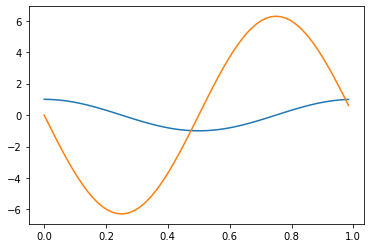

In [461]:
plt.plot(xx,np.cos(2*np.pi *xx))
plt.plot(xx,-2*np.pi*np.sin(2.*np.pi *xx))

In [468]:
kx

array([ 0.        ,  0.09817477,  0.19634954,  0.29452431,  0.39269908,
        0.49087385,  0.58904862,  0.68722339,  0.78539816,  0.88357293,
        0.9817477 ,  1.07992247,  1.17809725,  1.27627202,  1.37444679,
        1.47262156,  1.57079633,  1.6689711 ,  1.76714587,  1.86532064,
        1.96349541,  2.06167018,  2.15984495,  2.25801972,  2.35619449,
        2.45436926,  2.55254403,  2.6507188 ,  2.74889357,  2.84706834,
        2.94524311,  3.04341788,  3.14159265, -3.04341788, -2.94524311,
       -2.84706834, -2.74889357, -2.6507188 , -2.55254403, -2.45436926,
       -2.35619449, -2.25801972, -2.15984495, -2.06167018, -1.96349541,
       -1.86532064, -1.76714587, -1.6689711 , -1.57079633, -1.47262156,
       -1.37444679, -1.27627202, -1.17809725, -1.07992247, -0.9817477 ,
       -0.88357293, -0.78539816, -0.68722339, -0.58904862, -0.49087385,
       -0.39269908, -0.29452431, -0.19634954, -0.09817477])

In [469]:
kx.shape

(64,)

In [470]:
kx

array([ 0.        ,  0.09817477,  0.19634954,  0.29452431,  0.39269908,
        0.49087385,  0.58904862,  0.68722339,  0.78539816,  0.88357293,
        0.9817477 ,  1.07992247,  1.17809725,  1.27627202,  1.37444679,
        1.47262156,  1.57079633,  1.6689711 ,  1.76714587,  1.86532064,
        1.96349541,  2.06167018,  2.15984495,  2.25801972,  2.35619449,
        2.45436926,  2.55254403,  2.6507188 ,  2.74889357,  2.84706834,
        2.94524311,  3.04341788,  3.14159265, -3.04341788, -2.94524311,
       -2.84706834, -2.74889357, -2.6507188 , -2.55254403, -2.45436926,
       -2.35619449, -2.25801972, -2.15984495, -2.06167018, -1.96349541,
       -1.86532064, -1.76714587, -1.6689711 , -1.57079633, -1.47262156,
       -1.37444679, -1.27627202, -1.17809725, -1.07992247, -0.9817477 ,
       -0.88357293, -0.78539816, -0.68722339, -0.58904862, -0.49087385,
       -0.39269908, -0.29452431, -0.19634954, -0.09817477])

In [471]:
2 * np.pi/64

0.09817477042468103

In [490]:
2*np.pi*np.sin(2 * np.pi * xx )[1]/(-kx[1]*np.sin(2 * np.pi * xx )[1])

-1.0

In [478]:
kx

array([ 0.        ,  0.09817477,  0.19634954,  0.29452431,  0.39269908,
        0.49087385,  0.58904862,  0.68722339,  0.78539816,  0.88357293,
        0.9817477 ,  1.07992247,  1.17809725,  1.27627202,  1.37444679,
        1.47262156,  1.57079633,  1.6689711 ,  1.76714587,  1.86532064,
        1.96349541,  2.06167018,  2.15984495,  2.25801972,  2.35619449,
        2.45436926,  2.55254403,  2.6507188 ,  2.74889357,  2.84706834,
        2.94524311,  3.04341788,  3.14159265, -3.04341788, -2.94524311,
       -2.84706834, -2.74889357, -2.6507188 , -2.55254403, -2.45436926,
       -2.35619449, -2.25801972, -2.15984495, -2.06167018, -1.96349541,
       -1.86532064, -1.76714587, -1.6689711 , -1.57079633, -1.47262156,
       -1.37444679, -1.27627202, -1.17809725, -1.07992247, -0.9817477 ,
       -0.88357293, -0.78539816, -0.68722339, -0.58904862, -0.49087385,
       -0.39269908, -0.29452431, -0.19634954, -0.09817477])

In [482]:
2 * np.pi/64

0.09817477042468103

In [497]:
w = 2
-2 * np.pi * w * np.sin(2 * np.pi * w * xx )

array([-0.00000000e+00, -2.45157729e+00, -4.80894184e+00, -6.98150145e+00,
       -8.88576588e+00, -1.04485553e+01, -1.16098126e+01, -1.23249113e+01,
       -1.25663706e+01, -1.23249113e+01, -1.16098126e+01, -1.04485553e+01,
       -8.88576588e+00, -6.98150145e+00, -4.80894184e+00, -2.45157729e+00,
       -1.53893655e-15,  2.45157729e+00,  4.80894184e+00,  6.98150145e+00,
        8.88576588e+00,  1.04485553e+01,  1.16098126e+01,  1.23249113e+01,
        1.25663706e+01,  1.23249113e+01,  1.16098126e+01,  1.04485553e+01,
        8.88576588e+00,  6.98150145e+00,  4.80894184e+00,  2.45157729e+00,
        3.07787311e-15, -2.45157729e+00, -4.80894184e+00, -6.98150145e+00,
       -8.88576588e+00, -1.04485553e+01, -1.16098126e+01, -1.23249113e+01,
       -1.25663706e+01, -1.23249113e+01, -1.16098126e+01, -1.04485553e+01,
       -8.88576588e+00, -6.98150145e+00, -4.80894184e+00, -2.45157729e+00,
       -4.61680966e-15,  2.45157729e+00,  4.80894184e+00,  6.98150145e+00,
        8.88576588e+00,  

In [500]:
kx

array([ 0.        ,  0.00159155,  0.0031831 ,  0.00477465,  0.0063662 ,
        0.00795775,  0.0095493 ,  0.01114085,  0.0127324 ,  0.01432394,
        0.01591549,  0.01750704,  0.01909859,  0.02069014,  0.02228169,
        0.02387324,  0.02546479,  0.02705634,  0.02864789,  0.03023944,
        0.03183099,  0.03342254,  0.03501409,  0.03660564,  0.03819719,
        0.03978874,  0.04138029,  0.04297183,  0.04456338,  0.04615493,
        0.04774648,  0.04933803,  0.05092958,  0.05252113,  0.05411268,
        0.05570423,  0.05729578,  0.05888733,  0.06047888,  0.06207043,
        0.06366198,  0.06525353,  0.06684508,  0.06843663,  0.07002817,
        0.07161972,  0.07321127,  0.07480282,  0.07639437,  0.07798592,
       -0.07957747, -0.07798592, -0.07639437, -0.07480282, -0.07321127,
       -0.07161972, -0.07002817, -0.06843663, -0.06684508, -0.06525353,
       -0.06366198, -0.06207043, -0.06047888, -0.05888733, -0.05729578,
       -0.05570423, -0.05411268, -0.05252113, -0.05092958, -0.04

In [502]:
kx

array([   0.        ,    6.28318531,   12.56637061,   18.84955592,
         25.13274123,   31.41592654,   37.69911184,   43.98229715,
         50.26548246,   56.54866776,   62.83185307,   69.11503838,
         75.39822369,   81.68140899,   87.9645943 ,   94.24777961,
        100.53096491,  106.81415022,  113.09733553,  119.38052084,
        125.66370614,  131.94689145,  138.23007676,  144.51326207,
        150.79644737,  157.07963268,  163.36281799,  169.64600329,
        175.9291886 ,  182.21237391,  188.49555922,  194.77874452,
        201.06192983, -194.77874452, -188.49555922, -182.21237391,
       -175.9291886 , -169.64600329, -163.36281799, -157.07963268,
       -150.79644737, -144.51326207, -138.23007676, -131.94689145,
       -125.66370614, -119.38052084, -113.09733553, -106.81415022,
       -100.53096491,  -94.24777961,  -87.9645943 ,  -81.68140899,
        -75.39822369,  -69.11503838,  -62.83185307,  -56.54866776,
        -50.26548246,  -43.98229715,  -37.69911184,  -31.41592

In [17]:
w1x = 2
w1y = 3
w2x = 5
w2y = 2
xx = np.linspace(0, 1, 64, endpoint = False)
yy = np.linspace(0, 1, 64, endpoint = False)
f1 = np.cos(2.*np.pi * w1x * xx)[:,None] * np.sin(2.*np.pi * w1y * yy)[None,:]
f2 = np.sin(2.*np.pi * w2x * xx)[:,None] * np.sin(2.*np.pi * w2y * yy)[None,:]

df1dx = -2.*np.pi * w1x * np.sin(2.*np.pi * w1x * xx)[:,None] * np.sin(2.*np.pi * w1y * yy)[None,:]
df1dy =  2.*np.pi * w1y * np.cos(2.*np.pi * w1x * xx)[:,None] * np.cos(2.*np.pi * w1y * yy)[None,:]
df2dx = 2.*np.pi * w2x * np.cos(2.*np.pi * w2x * xx)[:,None] * np.sin(2.*np.pi * w2y * yy)[None,:]
df2dy = 2.*np.pi * w2y * np.sin(2.*np.pi * w2x * xx)[:,None] * np.cos(2.*np.pi * w2y * yy)[None,:]
poisson = df2dx * df1dy - df1dx * df2dy

In [18]:
np.sum(poisson)

-1.0764722446765518e-12

In [16]:
np.sum(df2dy)

-3.1641356201816835e-15

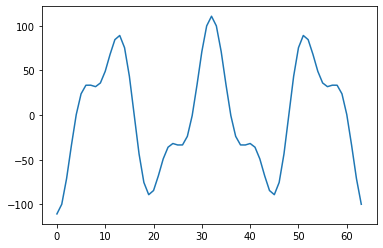

In [20]:
plt.plot(poisson[:,-1])

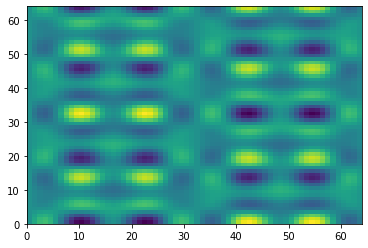

In [22]:
plt.pcolormesh(poisson)

# Check reality

In [228]:
projects_dir = ["ALLIANCE","memoryLeak","Alliance_alpha","fftw_many_mpi","Alliance_alpha_1.0"]
wrk_dir = "wrk"
chk_dir = "checkpoint"
sim_dir = ["testfold"]
HOME_PATH = "/home"
USERNAME = "alcauchy"
PROJECTS_DIR = "CLionProjects"
PROJECT_DIR = projects_dir[-1]
BASE_PATH = os.path.join(HOME_PATH,
                         USERNAME,
                         PROJECTS_DIR,
                         PROJECT_DIR,
                         wrk_dir,
                        sim_dir[0])

In [229]:
filename = os.path.join(BASE_PATH,"test_real_cond.h5")
with h5py.File(filename,'r') as f:
    f.visit(print)
    h = f["g"][()]

g


In [230]:
# checking f(kx,ky,0) = f*(-kx,-ky,0)
arPl = h[1:h.shape[0]//2, 1:h.shape[1]//2, 0, ...]
arMn = h[h.shape[0]//2+1:, h.shape[1]//2+1:, 0, ...]
np.allclose(arPl,np.conj(arMn)[::-1,::-1,...])

True

In [231]:
#checking f(0,ky,0) = f*(0,-ky,0)
arPl = h[0, 1:h.shape[1]//2, 0, ...]
arMn = h[0, h.shape[1]//2+1:, 0, ...]
np.allclose(arPl,np.conj(arMn)[::-1,...])

True

In [232]:
#checking f(kx,0,0) = f*(-kx,0,0)
arPl = h[1:h.shape[0]//2, 0, 0, ...]
arMn = h[h.shape[0]//2+1:, 0, 0, ...]
np.allclose(arPl,np.conj(arMn)[::-1,...])

True

In [1]:
def checkReality(h):
    # checking f(kx,ky,0) = f*(-kx,-ky,0)
    arPl = h[1:h.shape[0]//2, 1:h.shape[1]//2, 0, ...]
    arMn = h[h.shape[0]//2+1:, h.shape[1]//2+1:, 0, ...]
    print(np.allclose(arPl,np.conj(arMn)[::-1,::-1,...]))
    
    #checking f(0,ky,0) = f*(0,-ky,0)
    arPl = h[0, 1:h.shape[1]//2, 0, ...]
    arMn = h[0, h.shape[1]//2+1:, 0, ...]
    print(np.allclose(arPl,np.conj(arMn)[::-1,...]))
    
    #checking f(kx,0,0) = f*(-kx,0,0)
    arPl = h[1:h.shape[0]//2, 0, 0, ...]
    arMn = h[h.shape[0]//2+1:, 0, 0, ...]
    print(np.allclose(arPl,np.conj(arMn)[::-1,...]))

# Check set zero n half

In [250]:
projects_dir = ["ALLIANCE","memoryLeak","Alliance_alpha","fftw_many_mpi","Alliance_alpha_1.0"]
wrk_dir = "wrk"
chk_dir = "checkpoint"
sim_dir = ["testfold"]
HOME_PATH = "/home"
USERNAME = "alcauchy"
PROJECTS_DIR = "CLionProjects"
PROJECT_DIR = projects_dir[-1]
BASE_PATH = os.path.join(HOME_PATH,
                         USERNAME,
                         PROJECTS_DIR,
                         PROJECT_DIR,
                         wrk_dir,
                        sim_dir[0])

In [251]:
filename = os.path.join(BASE_PATH,"test_enforceZero.h5")
with h5py.File(filename,'r') as f:
    f.visit(print)
    h = f["g"][()]

g


In [252]:
np.allclose(h[h.shape[0]//2,:,...],0.j)

True

In [253]:
np.allclose(h[:,:,-1,...],0.j)

True

In [254]:
np.allclose(h[:,h.shape[1]//2,...],0.j)

True

# NONLINEAR TESTS

In [351]:
projects_dir = ["ALLIANCE","memoryLeak","Alliance_alpha","fftw_many_mpi","Alliance_alpha_1.0"]
wrk_dir = "wrk"
chk_dir = "checkpoint"
sim_dir = ["testfold"]
FIGURE_DIR = "fig"
HOME_PATH = "/home"
USERNAME = "alcauchy"
PROJECTS_DIR = "CLionProjects"
PROJECT_DIR = projects_dir[-1]
BASE_PATH = os.path.join(HOME_PATH,
                         USERNAME,
                         PROJECTS_DIR,
                         PROJECT_DIR,
                         wrk_dir,
                        sim_dir[0])
if not os.path.exists(FIGURE_DIR):
    os.makedirs(FIGURE_DIR)

In [352]:
FILENAME = "parameters.h5"
filename_params = os.path.join(BASE_PATH, FILENAME)
FIELDS_NAME  = "fields.h5"
filename_fields = os.path.join(BASE_PATH, FIELDS_NAME)

In [366]:
with h5py.File(filename_params,'r') as f:
    f.visit(print)
    mspec = f["spectra/mSpec"][()]
    kz = f["kSpace/kz"][()]
    kx = f["kSpace/kx"][()]
    ky = f["kSpace/ky"][()]
    shells = f["spectra/shells"][()]
    kspec = f["spectra/kSpec"][()]
    freeEn = f["freeEnergy/freeEnergy"][()]
    charge = f["parameters/charge"][()]
    T = f["parameters/temperature"][()]
    beta = f["parameters/beta"][()]
    J00 = f["parameters/J00"][()]
    J10 = f["parameters/J10"][()]
mGrid = np.arange(1,mspec.shape[1]+1)

with h5py.File("/home/alcauchy/CLionProjects/Alliance_alpha_1.0/wrk/testfold/h_0.h5",'r') as f:
    h = f["g"][()]
    

freeEnergy
freeEnergy/dt
freeEnergy/freeEnergy
freeEnergy/timestep
kSpace
kSpace/kx
kSpace/ky
kSpace/kz
parameters
parameters/J00
parameters/J10
parameters/beta
parameters/charge
parameters/density
parameters/mass
parameters/temperature
spectra
spectra/dt
spectra/kSpec
spectra/mSpec
spectra/shells
spectra/timestep


In [354]:
kperp = np.sqrt(kx[:,None]**2 + ky[None,:]**2)
kxx,kyy = np.meshgrid(kx,ky)

In [355]:
kxx.shape

(64, 64)

In [356]:
np.pi*64*np.sqrt(2)/np.sqrt(40)

44.95881427866065

In [357]:
10/(4*np.pi**2 * 64**2)

6.18415427504503e-05

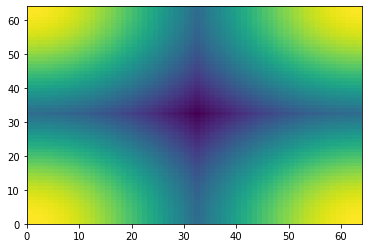

In [358]:
plt.pcolormesh(J10[...,0])

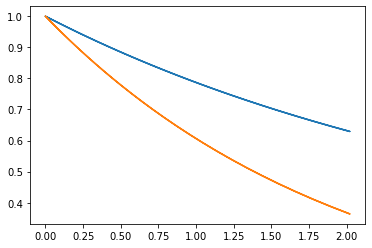

In [359]:
plt.plot(ky**2/2,J10[0,:,0])
plt.plot(ky**2/2,J00[0,:,0])

In [369]:
print(np.amax(np.abs(h)))
print(np.amax(np.abs(B)))

31742687.203520585
20462046.45894119


In [329]:
with h5py.File(filename_fields,'r') as f:
    f.visit(print)
    A = f["A"][()]
    phi = f["phi"][()]
    B = f["B"][()]

A
B
kx
ky
kz
phi
timestep


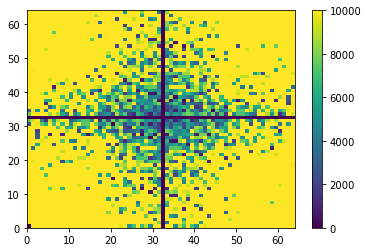

In [330]:
t = -1
plt.pcolormesh(np.abs(B[t,:,:,0]))
plt.colorbar()
plt.clim(0,1e4)


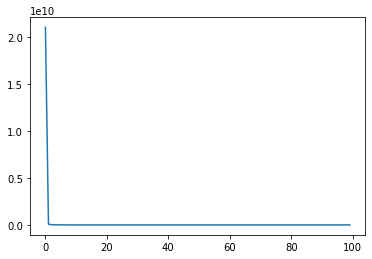

In [309]:
for t in range(kspec.shape[0]):
    plt.plot(kspec[t,:])

In [295]:
t = -1

In [296]:
def realityCheckField(f):
    # checking f(kx,ky,0) = f*(-kx,-ky,0)
    arPl = f[:,1:f.shape[1]//2, 1:f.shape[2]//2, 0]
    arMn = f[:,f.shape[1]//2+1:, f.shape[2]//2+1:, 0]
    print(np.allclose(arPl,np.conj(arMn)[:,::-1,::-1,...]))
    #checking f(0,ky,0) = f*(0,-ky,0)
    arPl = f[:,0, 1:f.shape[2]//2, 0]
    arMn = f[:,0, f.shape[2]//2+1:, 0]
    print(np.allclose(arPl,np.conj(arMn)[:,::-1,...]))
    #checking f(kx,0,0) = f*(-kx,0,0)
    arPl = f[:,1:f.shape[1]//2, 0, 0]
    arMn = f[:,f.shape[1]//2+1:, 0, 0]
    print(np.allclose(arPl,np.conj(arMn)[:,::-1,...]))

In [297]:
realityCheckField(B)
realityCheckField(phi)
realityCheckField(A)

True
True
True
True
True
True
True
True
True


In [298]:
arPl = B[0,1:B.shape[1]//2, 1:B.shape[2]//2, 0]
arMn = B[0,B.shape[1]//2+1:, B.shape[2]//2+1:, 0]

In [299]:
arMn.shape

(31, 31)

In [41]:
B[0,-1,-1,0]

(3.8541320924040203-13.449062127327274j)

In [42]:
kx[1:kx.shape[0]//2+1]

array([  6.28318531,  12.56637061,  18.84955592,  25.13274123,
        31.41592654,  37.69911184,  43.98229715,  50.26548246,
        56.54866776,  62.83185307,  69.11503838,  75.39822369,
        81.68140899,  87.9645943 ,  94.24777961, 100.53096491,
       106.81415022, 113.09733553, 119.38052084, 125.66370614,
       131.94689145, 138.23007676, 144.51326207, 150.79644737,
       157.07963268, 163.36281799, 169.64600329, 175.9291886 ,
       182.21237391, 188.49555922, 194.77874452, 201.06192983,
       207.34511514, 213.62830044, 219.91148575, 226.19467106,
       232.47785637, 238.76104167, 245.04422698, 251.32741229,
       257.61059759, 263.8937829 , 270.17696821, 276.46015352,
       282.74333882, 289.02652413, 295.30970944, 301.59289474,
       307.87608005, 314.15926536, 320.44245067, 326.72563597,
       333.00882128, 339.29200659, 345.57519189, 351.8583772 ,
       358.14156251, 364.42474782, 370.70793312, 376.99111843,
       383.27430374, 389.55748905, 395.84067435, 402.12

In [43]:
kx[kx.shape[0]//2+1:]

array([-395.84067435, -389.55748905, -383.27430374, -376.99111843,
       -370.70793312, -364.42474782, -358.14156251, -351.8583772 ,
       -345.57519189, -339.29200659, -333.00882128, -326.72563597,
       -320.44245067, -314.15926536, -307.87608005, -301.59289474,
       -295.30970944, -289.02652413, -282.74333882, -276.46015352,
       -270.17696821, -263.8937829 , -257.61059759, -251.32741229,
       -245.04422698, -238.76104167, -232.47785637, -226.19467106,
       -219.91148575, -213.62830044, -207.34511514, -201.06192983,
       -194.77874452, -188.49555922, -182.21237391, -175.9291886 ,
       -169.64600329, -163.36281799, -157.07963268, -150.79644737,
       -144.51326207, -138.23007676, -131.94689145, -125.66370614,
       -119.38052084, -113.09733553, -106.81415022, -100.53096491,
        -94.24777961,  -87.9645943 ,  -81.68140899,  -75.39822369,
        -69.11503838,  -62.83185307,  -56.54866776,  -50.26548246,
        -43.98229715,  -37.69911184,  -31.41592654,  -25.13274

In [44]:
mask = ~np.isclose(arPl,np.conj(arMn)[::-1,::-1])

In [45]:
np.argwhere(mask == True)

array([], shape=(0, 2), dtype=int64)

In [18]:
arMn[0,5]

(-0-0j)

In [19]:
arPl[0,-5]

(-0.0006627233219143047-0.941892578557552j)

In [26]:
B[0,1,6,0]

(-0-0j)

In [27]:
B[0,-1,-6,0]

(0.015153995523878878+0.01510640054621903j)

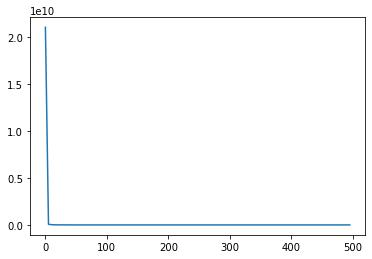

In [310]:
plt.plot(shells,kspec[-1,:])

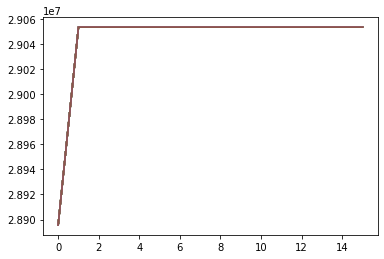

In [634]:
for t in range(mspec.shape[0]):
    plt.plot(mspec[t,:])

In [635]:
np.amax(ky)

50.26548245743669

In [636]:
2*np.pi*16/2

50.26548245743669

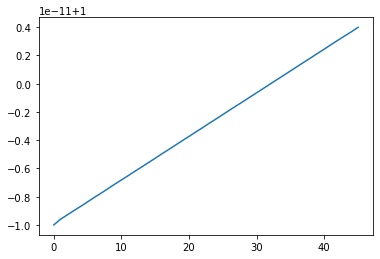

In [637]:
plt.plot(freeEn/freeEn[0])

# TEST OF {G,H}H

In [311]:
projects_dir = ["ALLIANCE","memoryLeak","Alliance_alpha","fftw_many_mpi","Alliance_alpha_1.0"]
wrk_dir = "wrk"
chk_dir = "checkpoint"
sim_dir = ["testfold"]
FIGURE_DIR = "fig"
HOME_PATH = "/home"
USERNAME = "alcauchy"
PROJECTS_DIR = "CLionProjects"
PROJECT_DIR = projects_dir[-1]
BASE_PATH = os.path.join(HOME_PATH,
                         USERNAME,
                         PROJECTS_DIR,
                         PROJECT_DIR,
                         wrk_dir,
                        sim_dir[0])

In [312]:
FILENAME = "buf_r.h5"
filename_0 = os.path.join(BASE_PATH, FILENAME)
FIELDS_NAME  = "h_r1.h5"
filename_1 = os.path.join(BASE_PATH, FIELDS_NAME)

In [313]:
with h5py.File(filename_0,'r') as f:
    f.visit(print)
    buf = f["g"][()]
with h5py.File(filename_1,'r') as f:
    f.visit(print)
    h = f["g"][()]

g
g


In [314]:
buf.shape

(128, 128, 66, 8, 2, 2)

In [315]:
np.sum(buf)

-4.5929482439532876e-11

In [316]:
np.sum(h)

-6.554046194651164e-11

In [317]:
np.sum(buf * h)

-0.42728110945952835

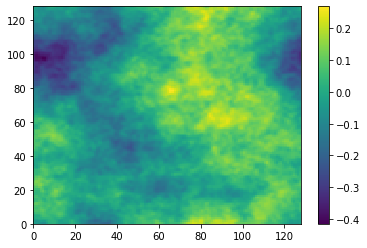

In [318]:
plt.pcolormesh(h[:,:,0,0,0,0])
plt.colorbar()

In [245]:
h.shape

(128, 128, 10, 8, 2, 2)

In [246]:
hBig = np.zeros(4 * h.size).reshape(2 * h.shape[0],2 * h.shape[1], h.shape[2],h.shape[3],h.shape[4],h.shape[5])
hBig.shape
hBig[:h.shape[0],:h.shape[0],...] = h
hBig[h.shape[0]:,:h.shape[0],...] = h
hBig[h.shape[0]:,h.shape[0]:,...] = h
hBig[:h.shape[0],h.shape[0]:,...] = h

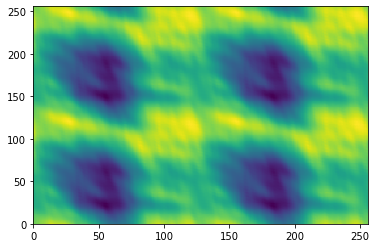

In [247]:
plt.pcolormesh(hBig[:,:,0,0,0,0])

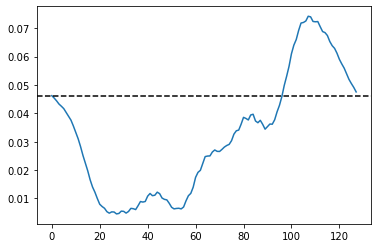

In [248]:
func = h[:,0,0,0,0,0]
plt.plot(func)
plt.axhline(y=func[0], color='k', linestyle='--')

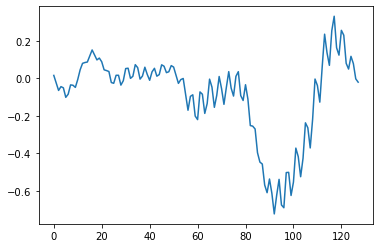

In [249]:
plt.plot(buf[:,1,0,0,0,0])

In [151]:
buf[-1,-1,0,0,0,0]

-61447.74663761788

In [150]:
buf[-1,0,0,0,0,0]

56913.290808922124

In [190]:
h[:,0,0,0,0,0]

array([ 1.        ,  0.99518473,  0.98078528,  0.95694034,  0.92387953,
        0.88192126,  0.83146961,  0.77301045,  0.70710678,  0.63439328,
        0.55557023,  0.47139674,  0.38268343,  0.29028468,  0.19509032,
        0.09801714,  0.        , -0.09801714, -0.19509032, -0.29028468,
       -0.38268343, -0.47139674, -0.55557023, -0.63439328, -0.70710678,
       -0.77301045, -0.83146961, -0.88192126, -0.92387953, -0.95694034,
       -0.98078528, -0.99518473, -1.        , -0.99518473, -0.98078528,
       -0.95694034, -0.92387953, -0.88192126, -0.83146961, -0.77301045,
       -0.70710678, -0.63439328, -0.55557023, -0.47139674, -0.38268343,
       -0.29028468, -0.19509032, -0.09801714,  0.        ,  0.09801714,
        0.19509032,  0.29028468,  0.38268343,  0.47139674,  0.55557023,
        0.63439328,  0.70710678,  0.77301045,  0.83146961,  0.88192126,
        0.92387953,  0.95694034,  0.98078528,  0.99518473,  1.        ,
        0.99518473,  0.98078528,  0.95694034,  0.92387953,  0.88

In [191]:
h[-1,0,0,0,0,0]

0.9951847266721968

# field test

In [437]:
projects_dir = ["ALLIANCE","memoryLeak","Alliance_alpha","fftw_many_mpi","Alliance_alpha_1.0"]
wrk_dir = "wrk"
chk_dir = "checkpoint"
sim_dir = ["testfold"]
FIGURE_DIR = "fig"
HOME_PATH = "/home"
USERNAME = "alcauchy"
PROJECTS_DIR = "CLionProjects"
PROJECT_DIR = projects_dir[-1]
BASE_PATH = os.path.join(HOME_PATH,
                         USERNAME,
                         PROJECTS_DIR,
                         PROJECT_DIR,
                         wrk_dir,
                        sim_dir[0])

In [438]:
FILENAME = "h_field.h5"
filename_h = os.path.join(BASE_PATH, FILENAME)
FIELDS_PHI  = "phi.h5"
filename_phi = os.path.join(BASE_PATH, FIELDS_PHI)
FIELDS_B  = "B.h5"
filename_b = os.path.join(BASE_PATH, FIELDS_B)
FIELDS_A  = "A.h5"
filename_a = os.path.join(BASE_PATH, FIELDS_A)

In [439]:
with h5py.File(filename_h,'r') as f:
    f.visit(print)
    h = f["g"][()]
with h5py.File(filename_phi,'r') as f:
    f.visit(print)
    phi = f["f"][()]
    
with h5py.File(filename_b,'r') as f:
    f.visit(print)
    B = f["f"][()]

with h5py.File(filename_a,'r') as f:
    f.visit(print)
    A = f["f"][()]

g
f
f
f


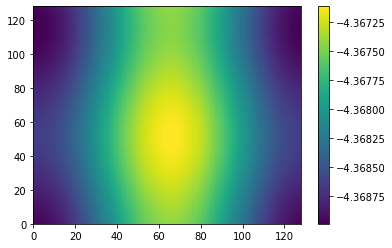

In [447]:
plt.pcolormesh(phi[...,34])
plt.colorbar()

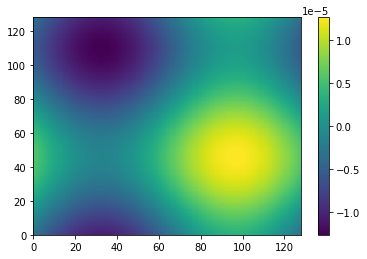

In [446]:
plt.pcolormesh(A[...,38])
plt.colorbar()

19.8427843856601


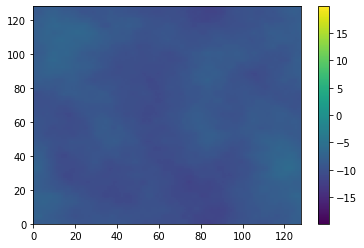

In [445]:
print(np.amax(B))
plt.pcolormesh(B[...,39])
plt.colorbar()
plt.clim([-np.amax(B),np.amax(B)])

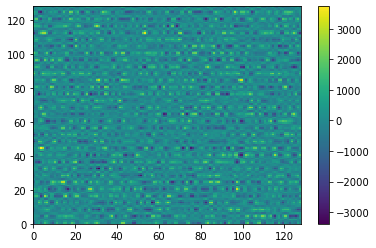

In [448]:
plt.pcolormesh(h[...,34,0,0,0])
plt.colorbar()

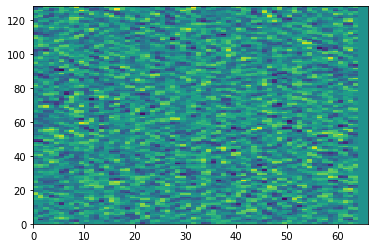

In [449]:
plt.pcolormesh(h[0,:,:,0,0,0])

In [451]:
np.sum(h)

-4.656612873077393e-10

In [361]:
with h5py.File("/media/alcauchy/My Book/Gene/h5/gk_7.h5",'r') as f:
    f.visit(print)
    dens = f["dens"][()]
    Bpark = f["Bpar_k"][()]
    Apark = f["Apar_k"][()]
    kx = f["kx"][()]
    lx = f["lx"][()]

Apar
AparFactor
Apar_k
Bessel0
Bpar
BparFactor
Bpar_k
FM
I1factor
Phi
PhiFactor
Phi_k
beta
charge
dens
dmu
dv
gk
gr
kx
ky
lv
lw
lx
ly
lz
mass
mu
nkx
nky
ns
nv
nw
nx
ny
nz
temper
time
timestep
vp
zz


In [335]:
np.amax(buf)

7.517023046769164e-05

In [338]:
dens

array([1., 1.])

In [341]:
np.amax(np.abs(Bpark))

1.6415451218090598

In [345]:
Bpark.shape

(512, 256, 96)

In [349]:
np.amax(np.abs(Apark))

55.517552795918995

In [350]:
kx

array([  0.        ,   0.20000017,   0.40000034,   0.60000051,
         0.80000068,   1.00000084,   1.20000101,   1.40000118,
         1.60000135,   1.80000152,   2.00000169,   2.20000186,
         2.40000203,   2.6000022 ,   2.80000237,   3.00000253,
         3.2000027 ,   3.40000287,   3.60000304,   3.80000321,
         4.00000338,   4.20000355,   4.40000372,   4.60000389,
         4.80000405,   5.00000422,   5.20000439,   5.40000456,
         5.60000473,   5.8000049 ,   6.00000507,   6.20000524,
         6.40000541,   6.60000557,   6.80000574,   7.00000591,
         7.20000608,   7.40000625,   7.60000642,   7.80000659,
         8.00000676,   8.20000693,   8.4000071 ,   8.60000726,
         8.80000743,   9.0000076 ,   9.20000777,   9.40000794,
         9.60000811,   9.80000828,  10.00000845,  10.20000862,
        10.40000878,  10.60000895,  10.80000912,  11.00000929,
        11.20000946,  11.40000963,  11.6000098 ,  11.80000997,
        12.00001014,  12.2000103 ,  12.40001047,  12.60

In [362]:
lx

31.4159

In [365]:
1/(2. * np.pi / (3*lx))

14.999987330042025

# Nonlinear RHS

In [397]:
projects_dir = ["ALLIANCE","memoryLeak","Alliance_alpha","fftw_many_mpi","Alliance_alpha_1.0"]
wrk_dir = "wrk"
chk_dir = "checkpoint"
sim_dir = ["testfold"]
FIGURE_DIR = "fig"
HOME_PATH = "/home"
USERNAME = "alcauchy"
PROJECTS_DIR = "CLionProjects"
PROJECT_DIR = projects_dir[-1]
BASE_PATH = os.path.join(HOME_PATH,
                         USERNAME,
                         PROJECTS_DIR,
                         PROJECT_DIR,
                         wrk_dir,
                        sim_dir[0])

In [398]:
filename = os.path.join(BASE_PATH,"dhdx_0.h5")
with h5py.File(filename,'r') as f:
    for key in f.keys():
        dhdx = f[key][()]
        
filename = os.path.join(BASE_PATH,"dhdy_0.h5")
with h5py.File(filename,'r') as f:
    for key in f.keys():
        dhdy = f[key][()]

filename = os.path.join(BASE_PATH,"dchidx_0.h5")
with h5py.File(filename,'r') as f:
    for key in f.keys():
        dchidx = f[key][()]
        
filename = os.path.join(BASE_PATH,"dchidy_0.h5")
with h5py.File(filename,'r') as f:
    for key in f.keys():
        dchidy = f[key][()]
        
filename = os.path.join(BASE_PATH,"rhs_0.h5")
with h5py.File(filename,'r') as f:
    for key in f.keys():
        rhs = f[key][()]

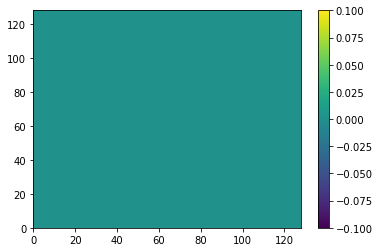

In [399]:
plt.pcolormesh(dchidy[:,:,0,0,2])
plt.colorbar()

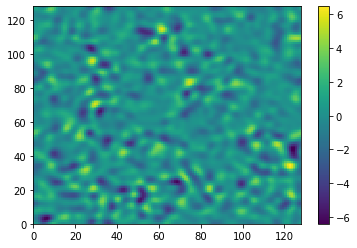

In [400]:
plt.pcolormesh(rhs[:,:,0,0,0,0])
plt.colorbar()

In [401]:
mp1 = np.asarray([np.sqrt((m+1)/2) for m  in range(dhdx.shape[3])]) 
mm1 = np.asarray([np.sqrt((m)/2) for m  in range(dhdx.shape[3])]) 

In [402]:
mp1.shape

(2,)

In [403]:
mm1


array([0.        , 0.70710678])

In [404]:
# computing {chi_phiB,h_l}
rhs_theoretical = np.sum(dchidy[:,:,:,None,None,:,[0,2]], axis = -1) * dhdx - np.sum(dchidx[:,:,:,None,None,:,[0,2]], axis = -1) * dhdy


#computing {chi_phiB, h0}_l=1 AND 
# {chi_phiB, h1}_l=0
rhs_theoretical[...,0,:] += dchidy[:,:,:,None,:,2] * dhdx[...,1,:] - dchidx[:,:,:,None,:,2] * dhdy[...,1,:]
rhs_theoretical[...,1,:] += dchidy[:,:,:,None,:,2] * dhdx[...,0,:] - dchidx[:,:,:,None,:,2] * dhdy[...,0,:]
rhs_theoretical[...,1,:] += 2. * (dchidy[:,:,:,None,:,2] * dhdx[...,1,:] - dchidx[:,:,:,None,:,2] * dhdy[...,1,:])

#computing {chi_A,h}
dchidy_A = dchidy[...,1]
dchidx_A = dchidx[...,1]
# sqrt((m+1)/2) {chi_A, h^(m+1)}
rhs_theoretical[...,:-1,:,:] += mp1[None,None,None,:-1,None,None] * (dchidy_A[:,:,:,None,None,:] * dhdx[...,1:,:,:] - dchidx_A[:,:,:,None,None,:] * dhdy[...,1:,:,:])
rhs_theoretical[...,1:,:,:] += mm1[None,None,None,1:,None,None] * (dchidy_A[:,:,:,None,None,:] * dhdx[...,:-1,:,:] - dchidx_A[:,:,:,None,None,:] * dhdy[...,:-1,:,:])


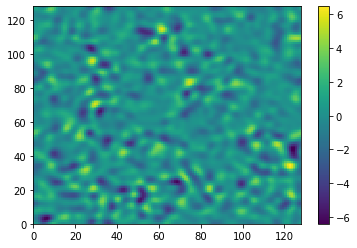

In [405]:
plt.pcolormesh(rhs_theoretical[:,:,0,0,0,0])
plt.colorbar()

In [406]:
for z in range(rhs.shape[2]):
    print(np.allclose(rhs[:,:,z,:,:,:], rhs_theoretical[:,:,z,:,:,:]))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False


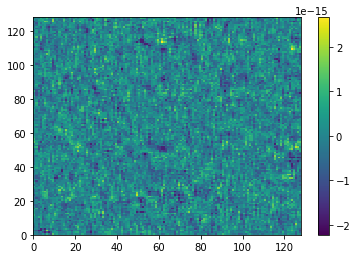

In [407]:
plt.pcolormesh((rhs-rhs_theoretical)[:,:,0,0,0,0])
plt.colorbar()

In [408]:
rhs.shape

(128, 128, 18, 2, 2, 2)